<a href="https://colab.research.google.com/github/kashishthakur26/MLprojects/blob/main/Liver_Disease_Patient_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Liver patient prediction

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### import the dataset

In [2]:
liver_data = pd.read_csv("/content/drive/MyDrive/Colab-notebooks/Indian Liver Patient Dataset (ILPD).csv")

In [3]:
liver_data.head()

age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1

In [4]:
### renaming the columns
liver_data.columns = ["Age","Gender","Total_Bilirubin","Direct_Bilirubin",
                      "Alkaline_Phosphotase","Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_protiens",
                      "Albumin","Albumin_Globulin_Ratio","Target"]

In [5]:
liver_data

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_Globulin_Ratio  Target  
0        3.3                    0.90       1  
1        3.2                    0.74       1  
2        3.3                    0.89       1  
3        3.4                    1.00       1  
4        2.4                    0.40       1  
..       ...                     ...     ...  
578      1.6                    0.37       2  
579      3.2                    1.10       1  
580      3.2                    1.00       1  
581      3.4                    1.00       1  
582      4.4                    1.50       2  

[583 rows x 11 columns]

In [6]:
liver_data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_Globulin_Ratio      Target  
count  583.000000              579.000000  583.000000  
mean     3.141852                0.947064    1.286449  
std      0.795519                0.319592    0.452490  
min      0.900000                0.300000    1.000000  
25%      2.600000                0.700000    1.000000  
50%      3.100000                0.930000    1.000000  
75%      3.800000                1.100000    2.000000  
max      5.500000                2.800000    2.000000

In [9]:
liver_data.isna().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alanine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_protiens                False
Albumin                       False
Albumin_Globulin_Ratio         True
Target                        False
dtype: bool

In [12]:
liver_data = liver_data.dropna()

In [13]:
liver_data["Target"].value_counts()

1    414
2    165
Name: Target, dtype: int64

### Check for duplicate values

In [14]:
print(liver_data.duplicated().sum())
liver_data[liver_data.duplicated()]

13


Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female              0.9               0.3                   293   
26    34    Male              4.1               2.0                   289   
34    38  Female              2.6               1.2                   410   
55    42    Male              8.9               4.5                   272   
62    58    Male              1.0               0.5                   158   
106   36    Male              5.3               2.3                   145   
108   36    Male              0.8               0.2                   158   
138   18    Male              0.8               0.2                   282   
143   30    Male              1.6               0.4                   332   
158   72    Male              0.7               0.1                   196   
164   39    Male              1.9               0.9                   180   
174   31    Male              0.6               0.1                   175   
201   49    Male              0.6               0.1                   218   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_protiens  \
19                        232                         245             6.8   
26                        875                         731             5.0   
34                         59                          57             5.6   
55                         31                          61             5.8   
62                         37                          43             7.2   
106                        32                          92             5.1   
108                        29                          39             6.0   
138                        72                         140             5.5   
143                        84                         139             5.6   
158                        20                          35             5.8   
164                        42                          62             7.4   
174                        48                          34             6.0   
201                        50                          53             5.0   

     Albumin  Albumin_Globulin_Ratio  Target  
19       3.1                    0.80       1  
26       2.7                    1.10       1  
34       3.0                    0.80       2  
55       2.0                    0.50       1  
62       3.6                    1.00       1  
106      2.6                    1.00       2  
108      2.2                    0.50       2  
138      2.5                    0.80       1  
143      2.7                    0.90       1  
158      2.0                    0.50       1  
164      4.3                    1.38       1  
174      3.7                    1.60       1  
201      2.4                    0.90       1

## Data visualization and analysis

In [16]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 72.4 MB/s eta 0:00:00


In [17]:
import sweetviz as sv

In [18]:
liver_data_univar_rpt = sv.analyze(liver_data)

                                             |          | [  0%]   00:00 -> (? left)


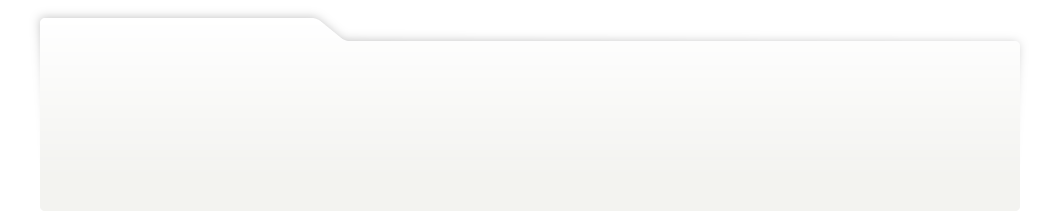
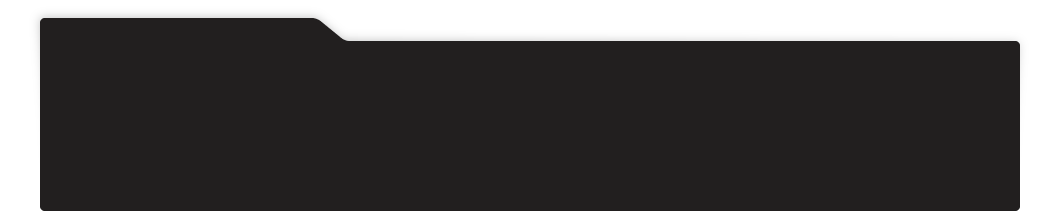
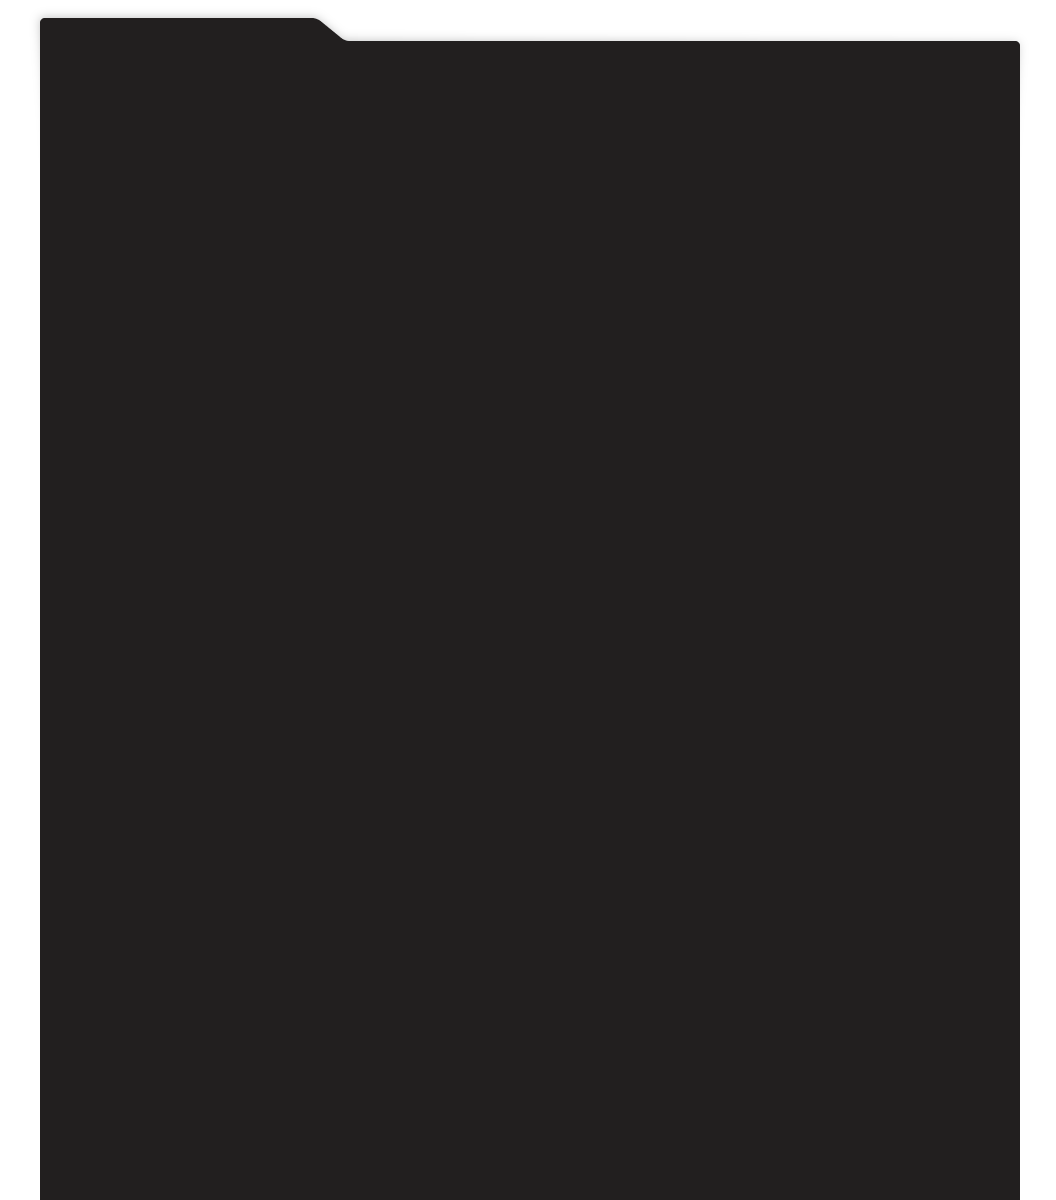
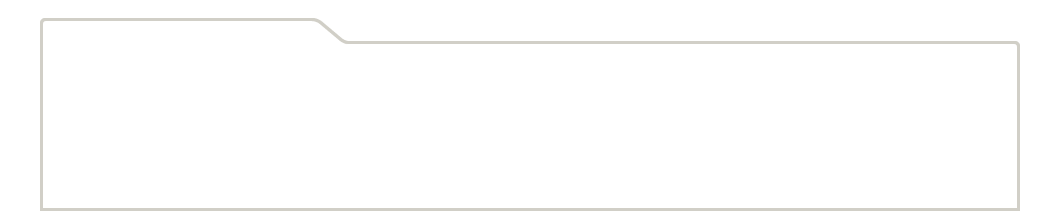
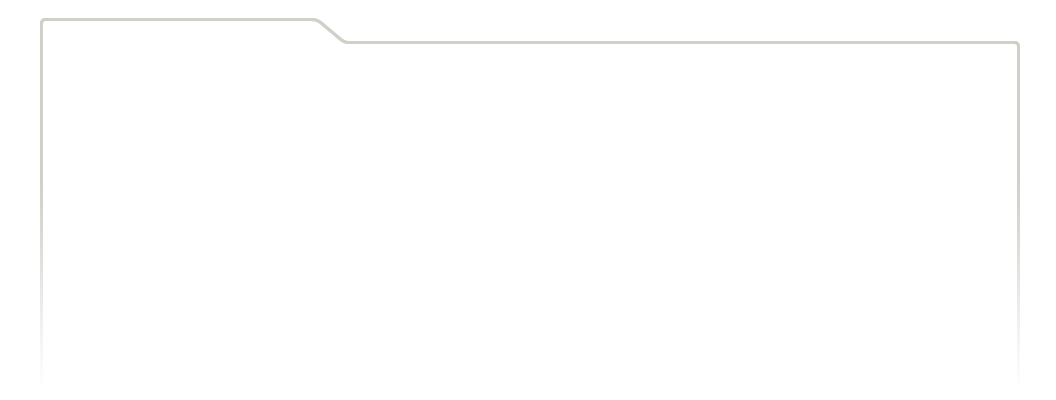
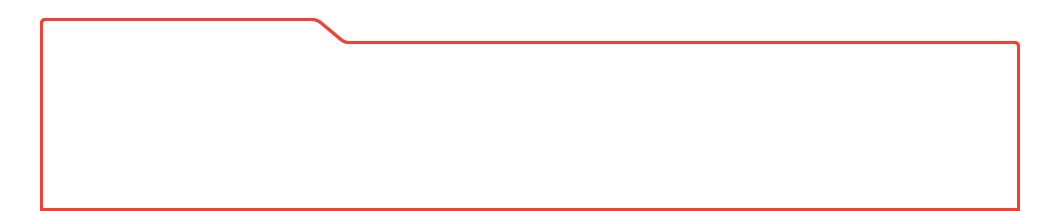
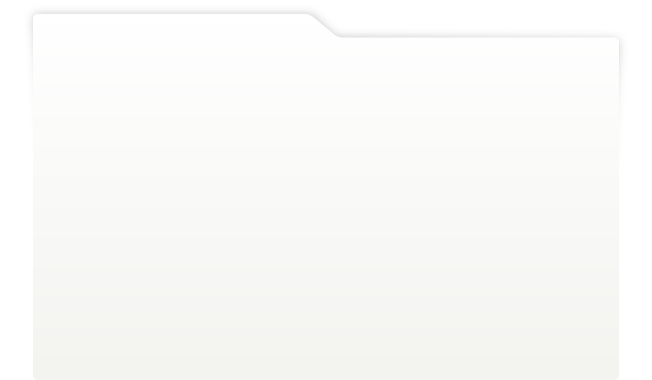
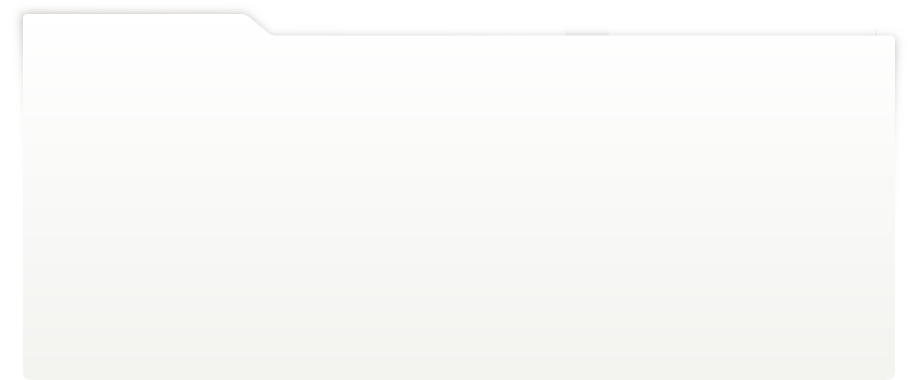
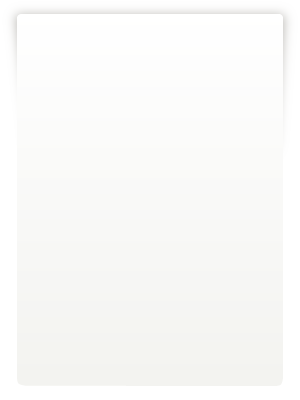
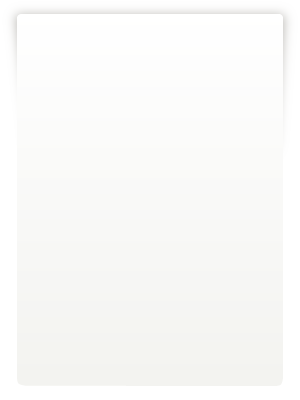
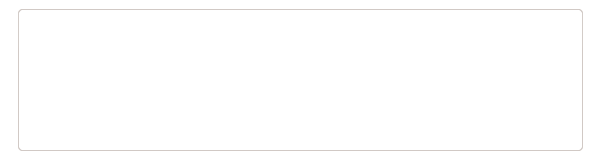
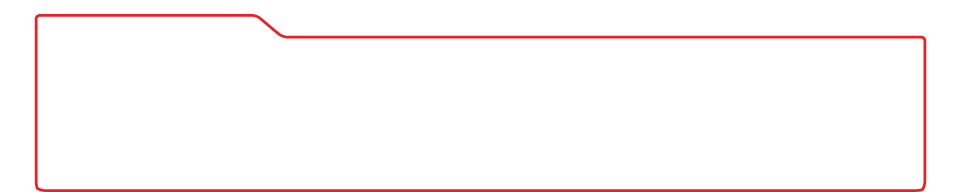
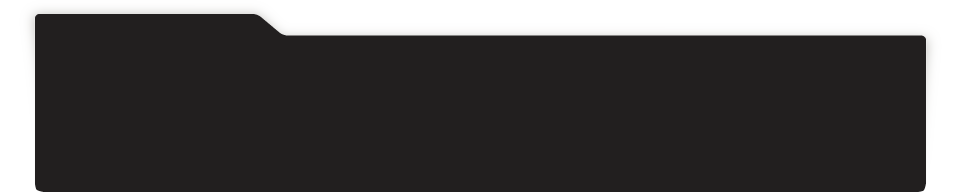
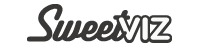
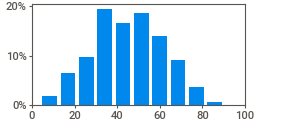
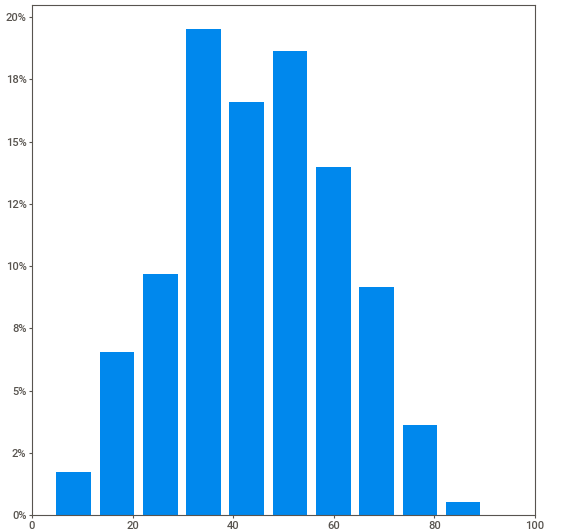
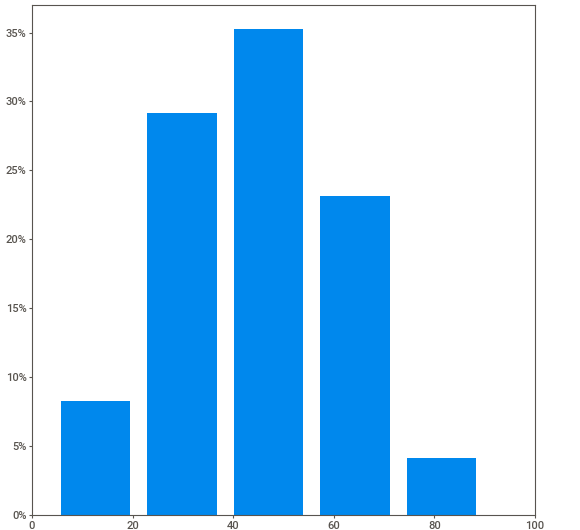
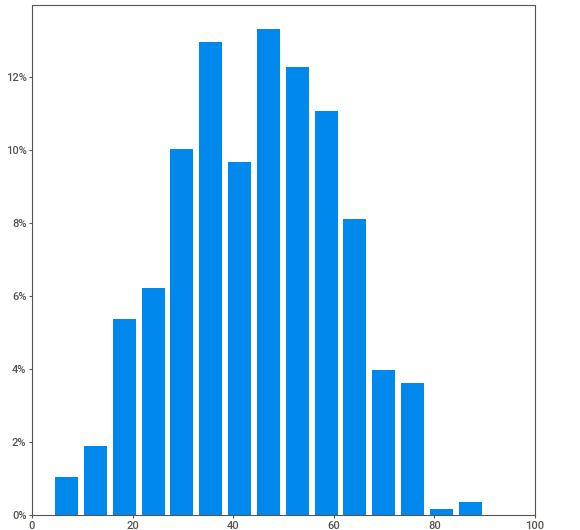
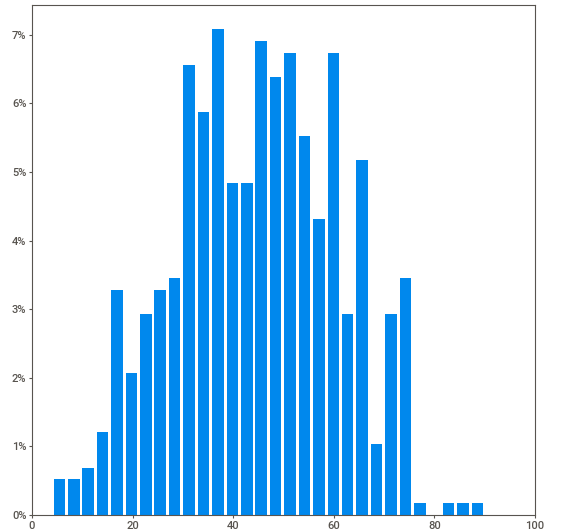
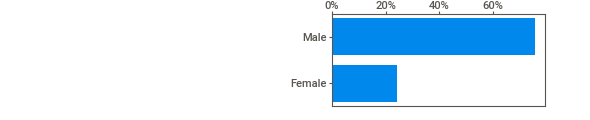
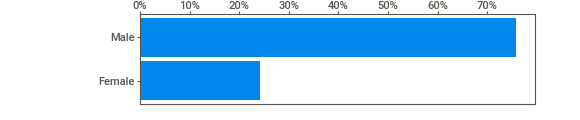
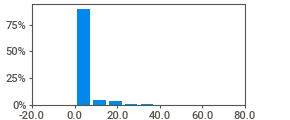
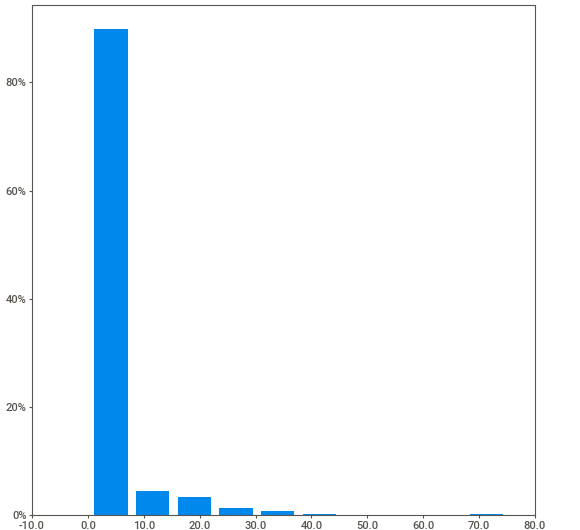
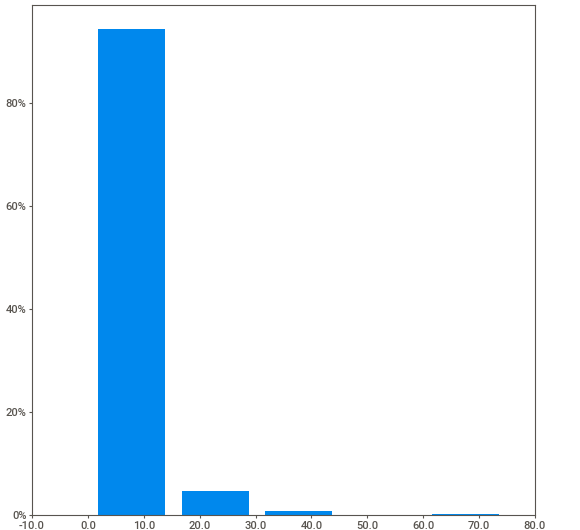
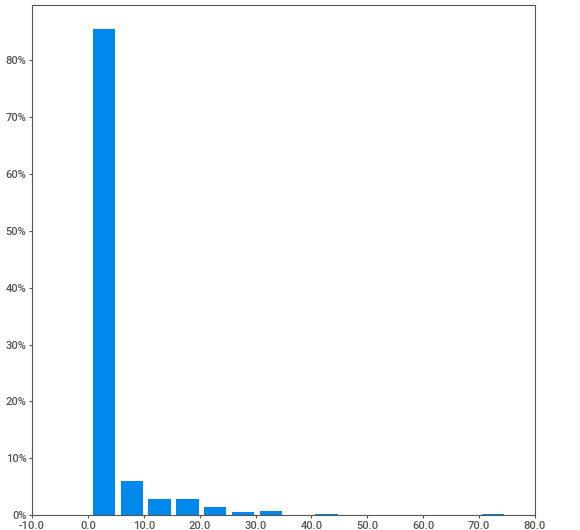
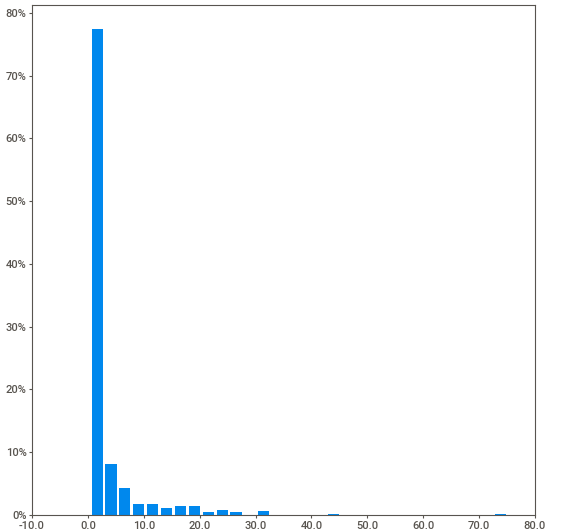
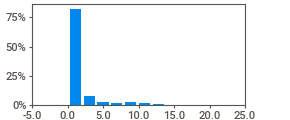
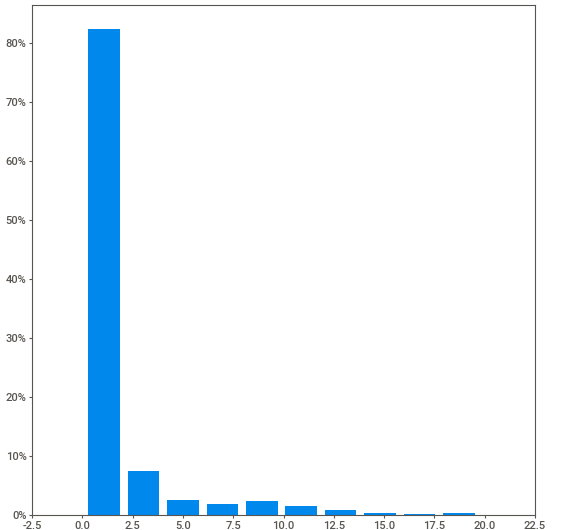
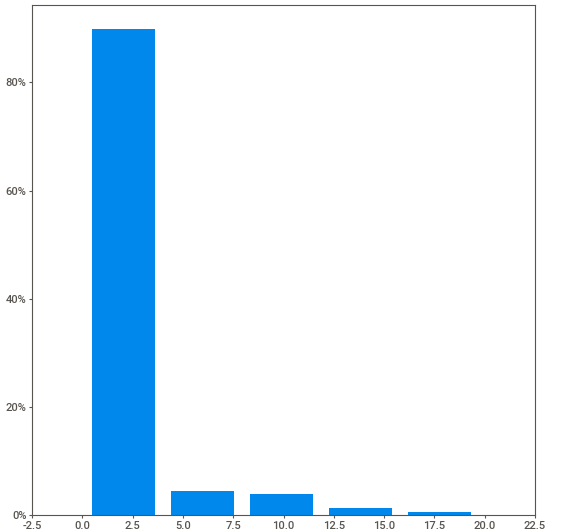
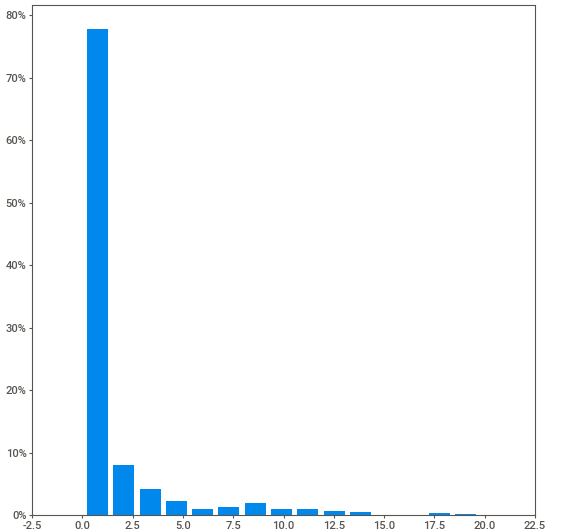
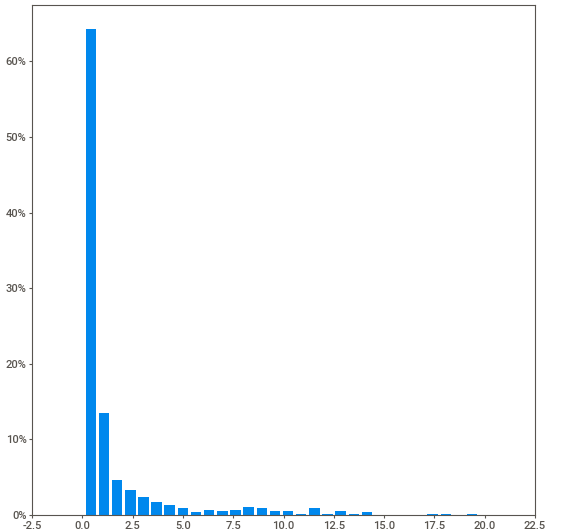
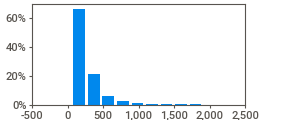
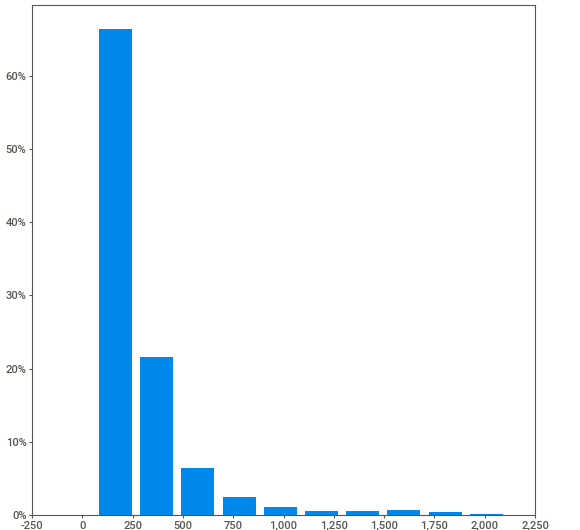
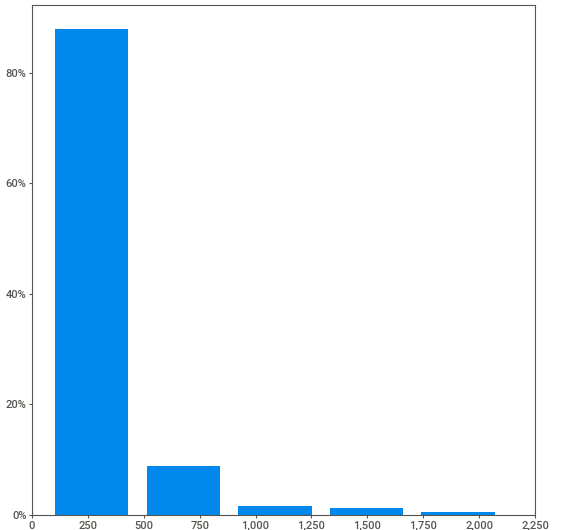
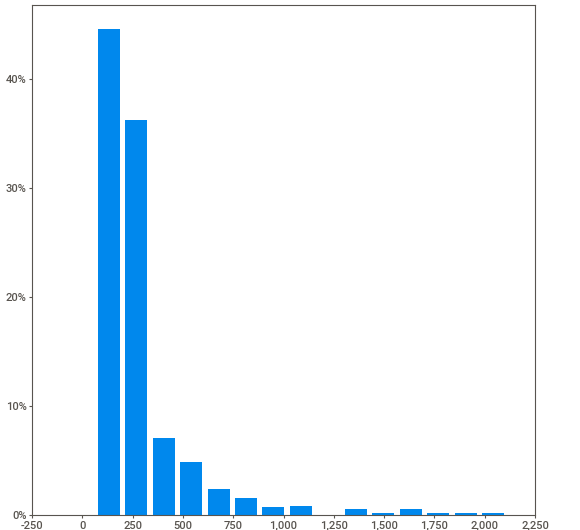
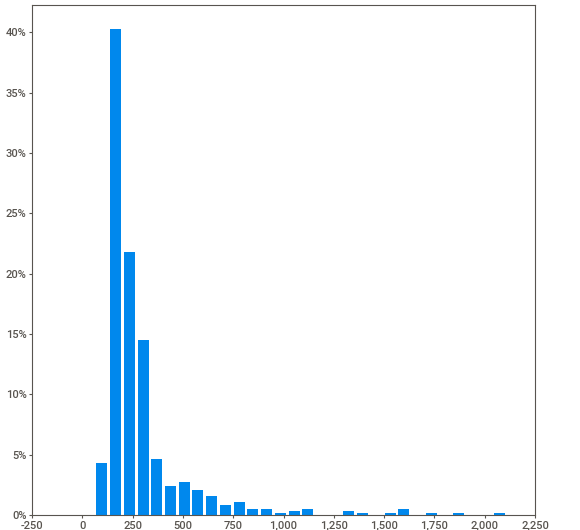
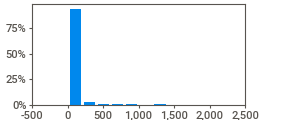
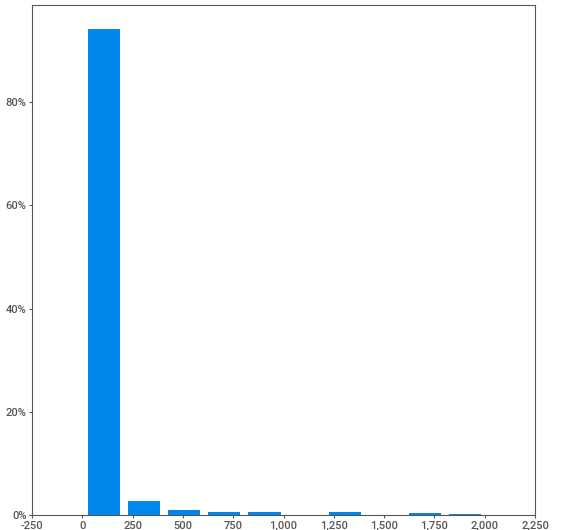
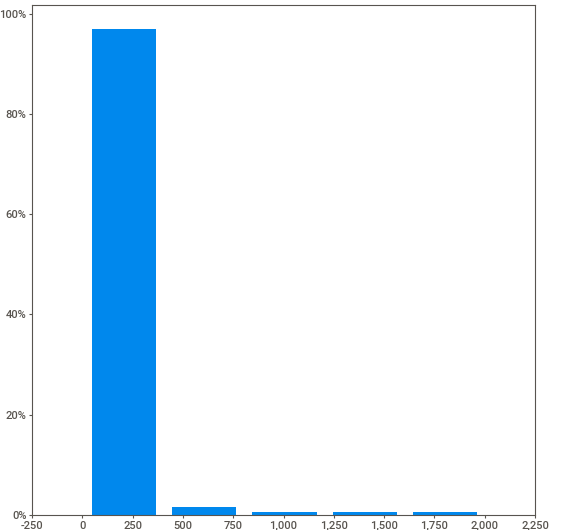
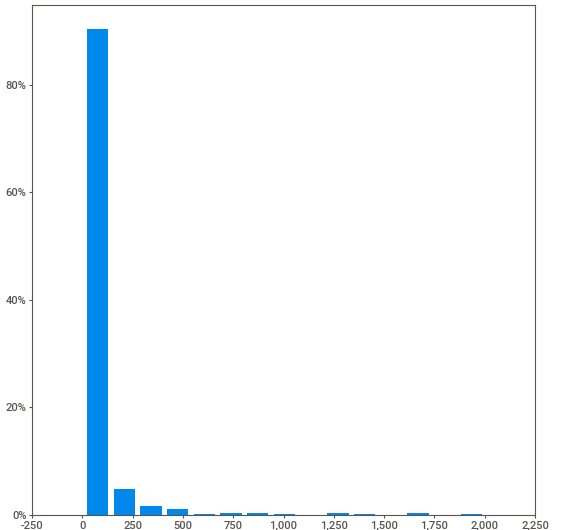
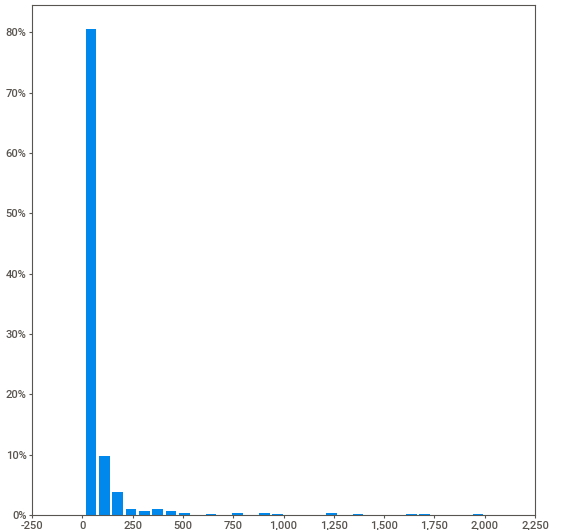
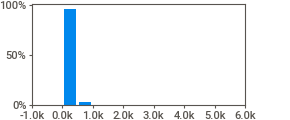
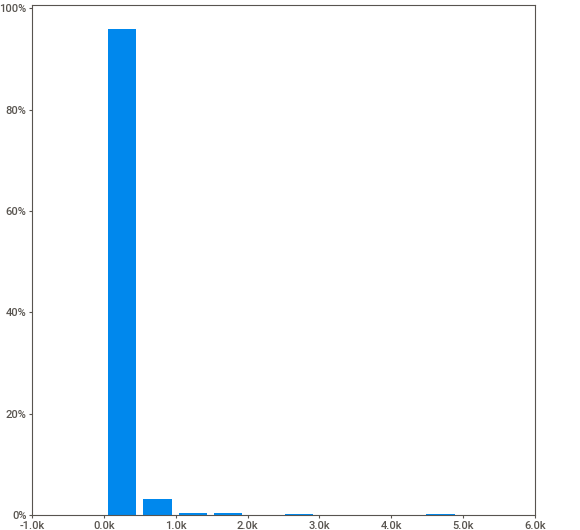
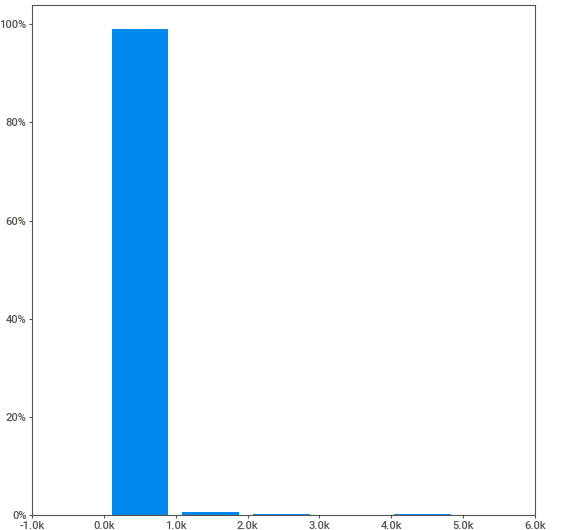
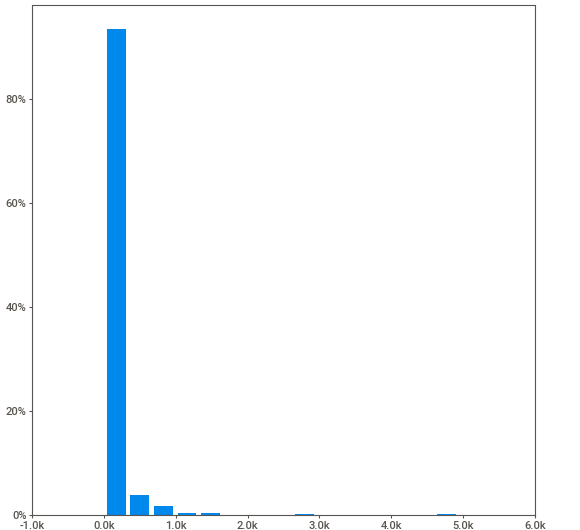
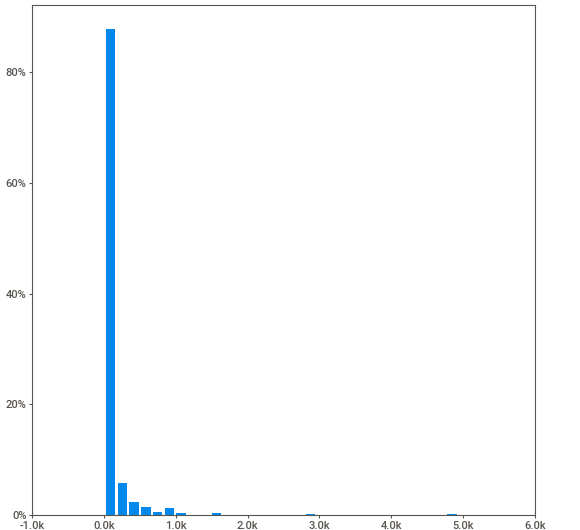
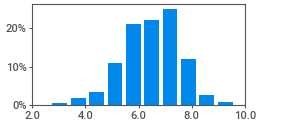
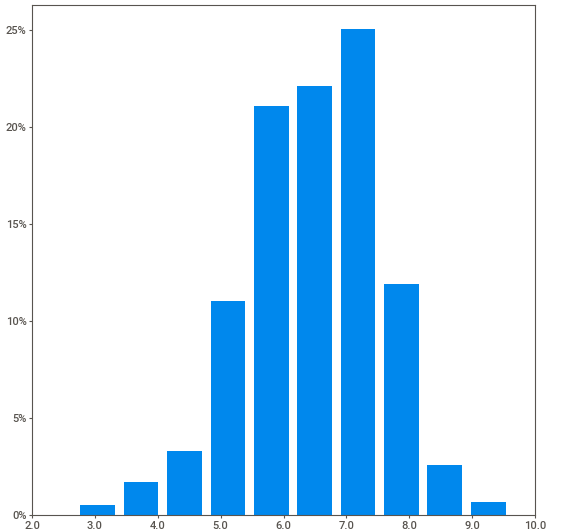
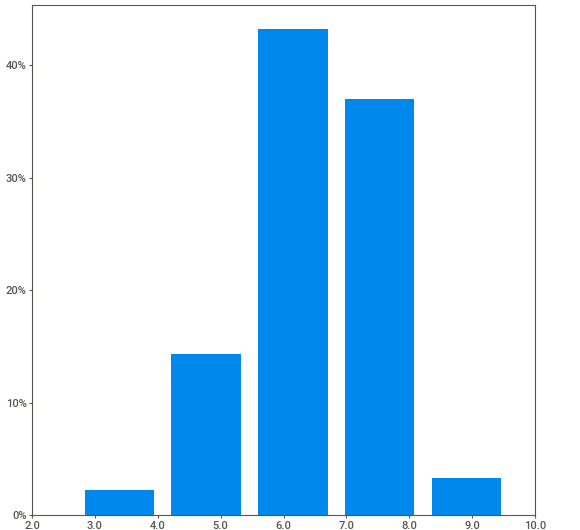
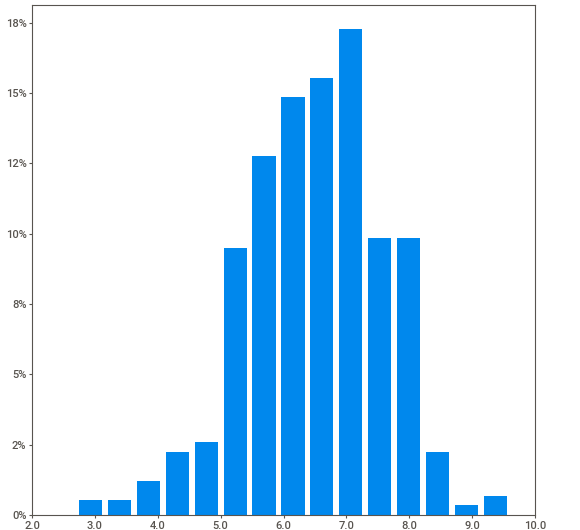
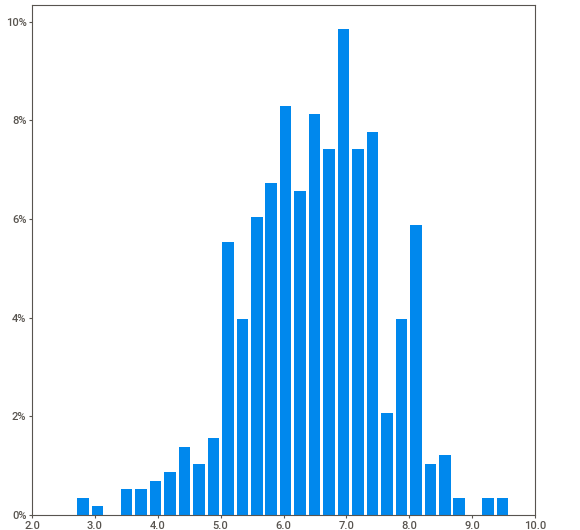
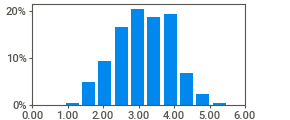
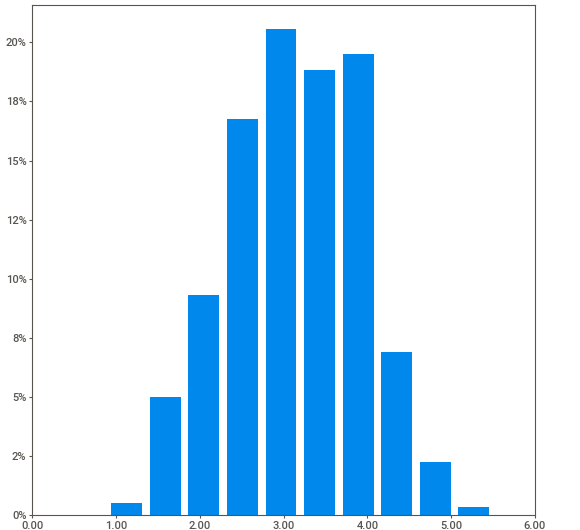
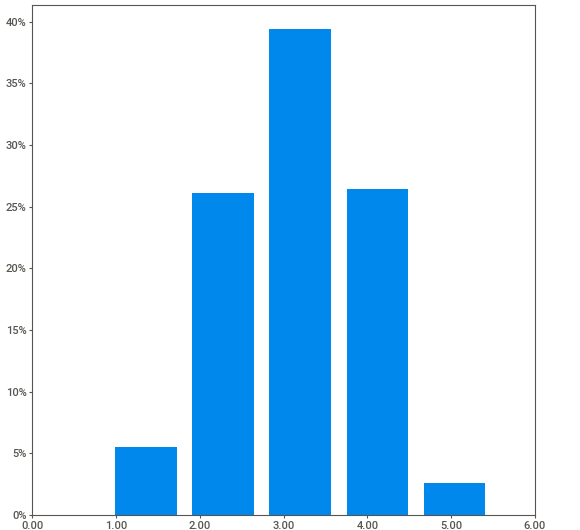
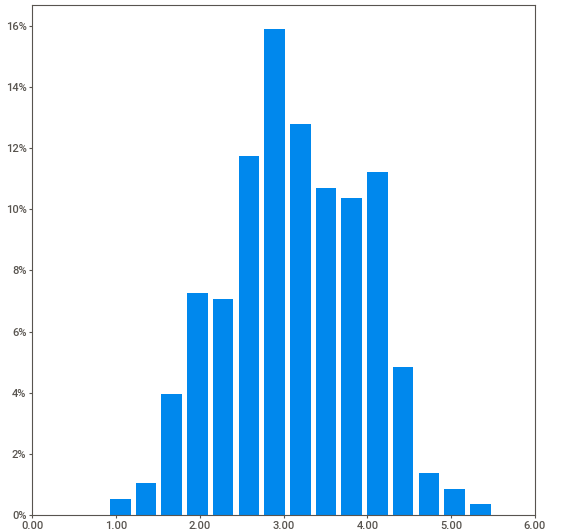
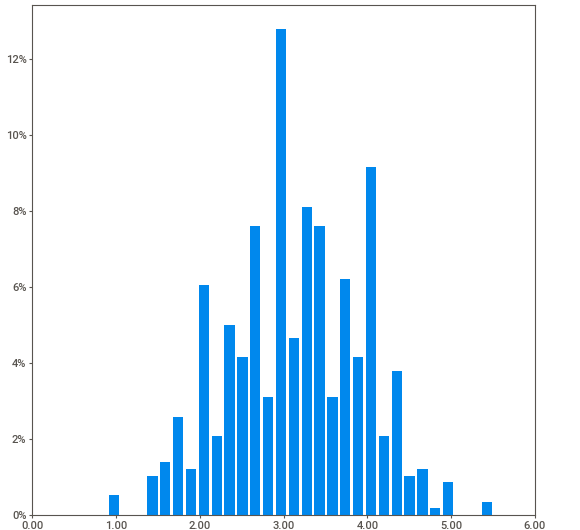
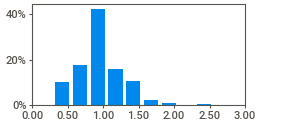
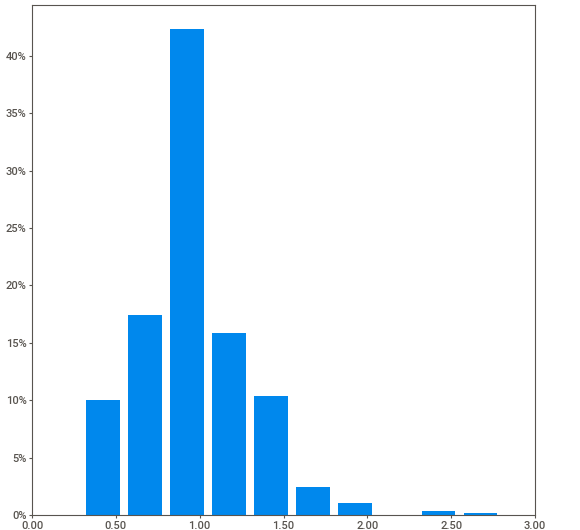
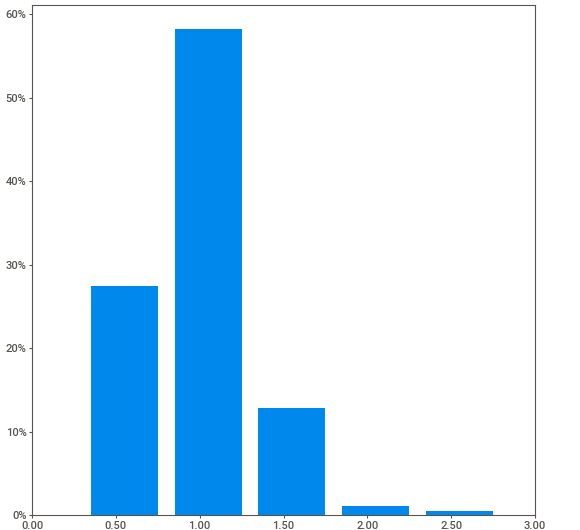
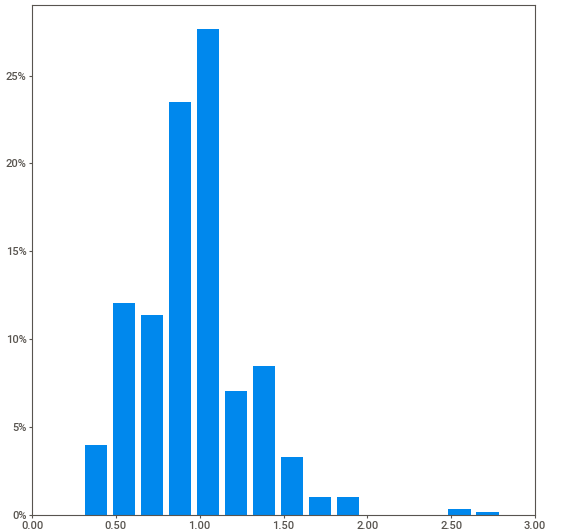
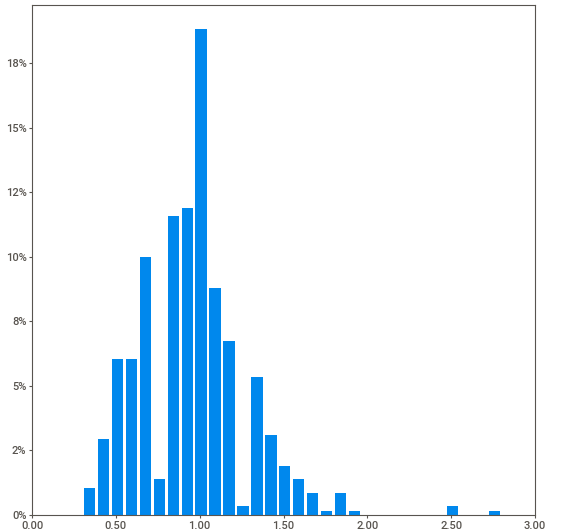
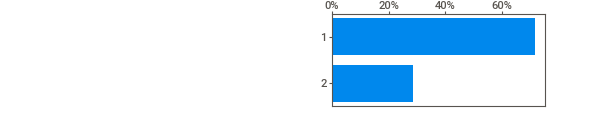
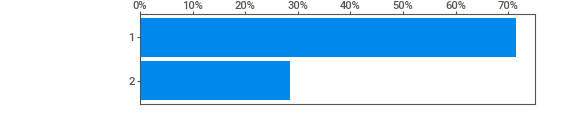
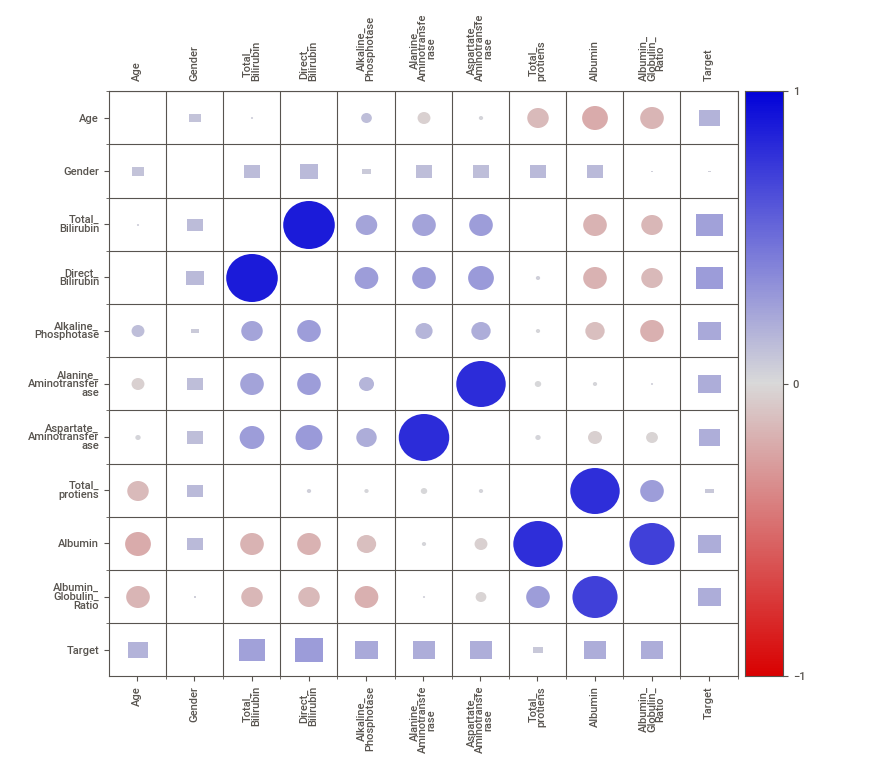
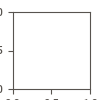

In [19]:
liver_data_univar_rpt.show_notebook()

#### Analysis via Boxplot

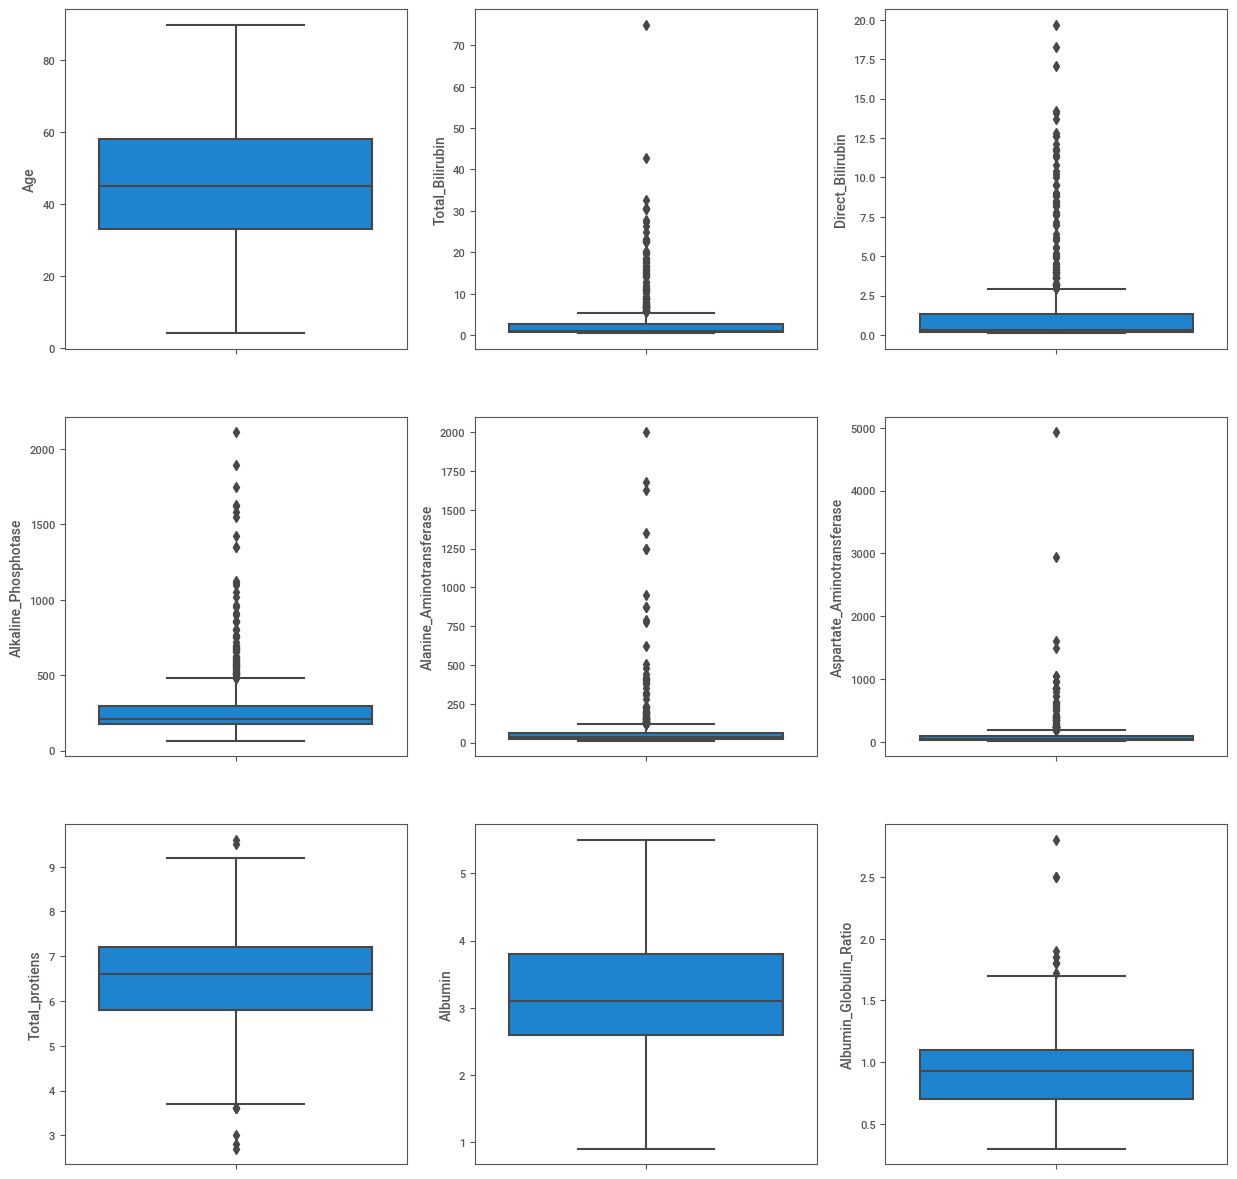

In [21]:
plt.figure(figsize=(15,15))
plt_num = 1
liver_data_num = liver_data.columns
liver_data_num = liver_data_num.drop(['Gender',"Target"])

for column in liver_data_num:
  if plt_num <=9:
    plt.subplot(3,3,plt_num)
    sns.boxplot(y=liver_data[column])
  plt_num+=1

plt.show()

#### Bivariate analysis

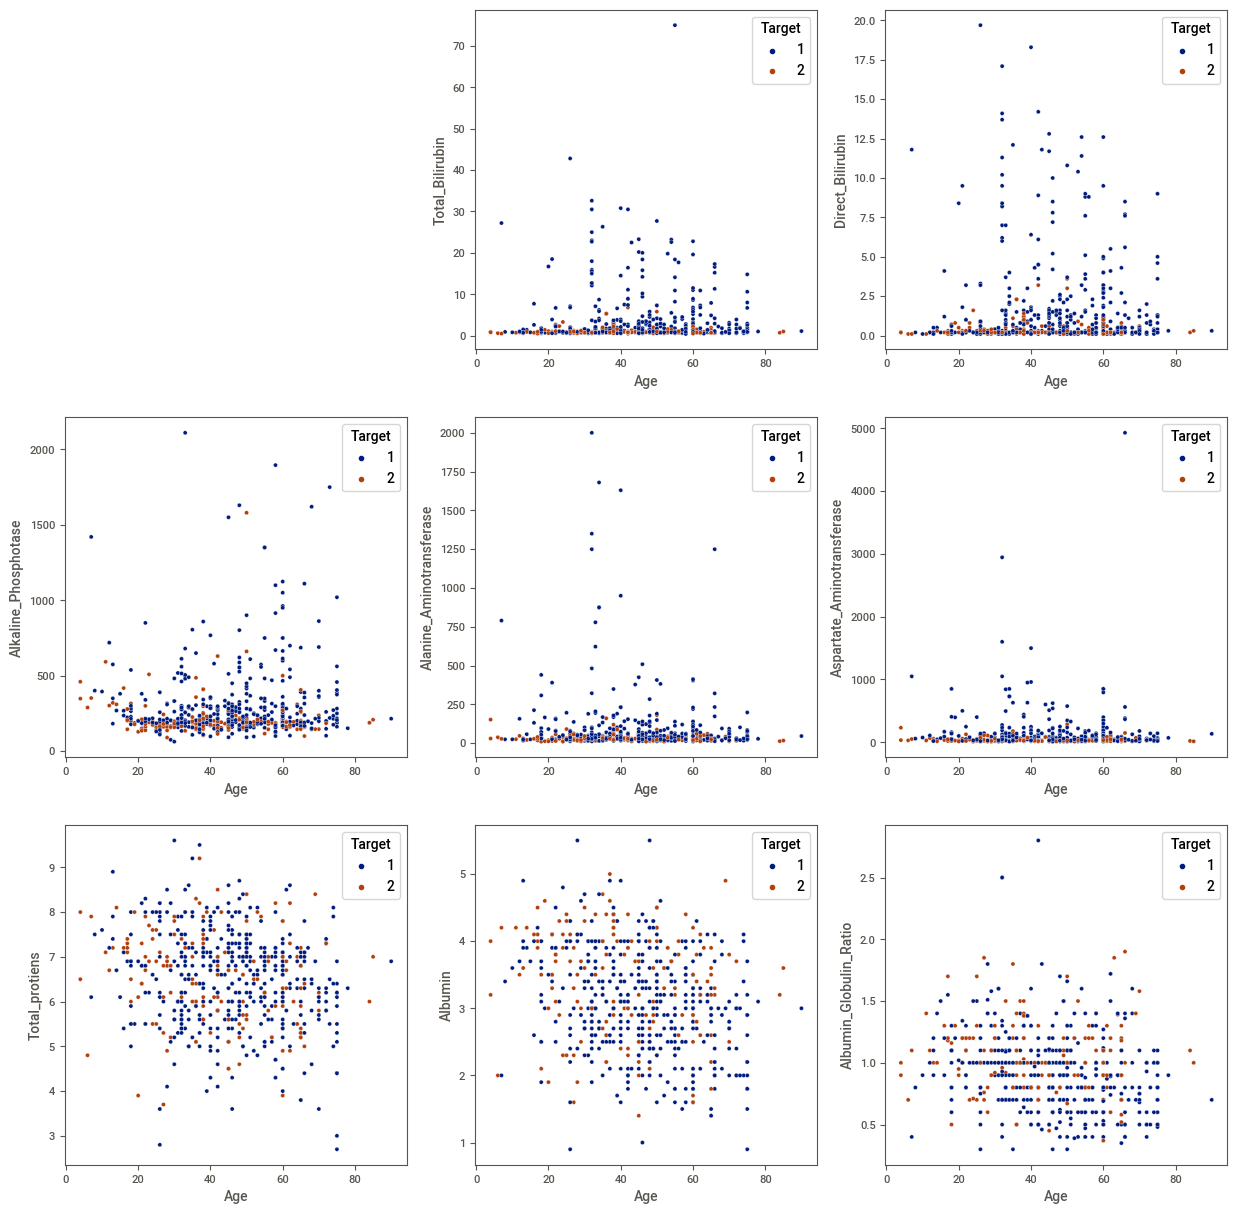

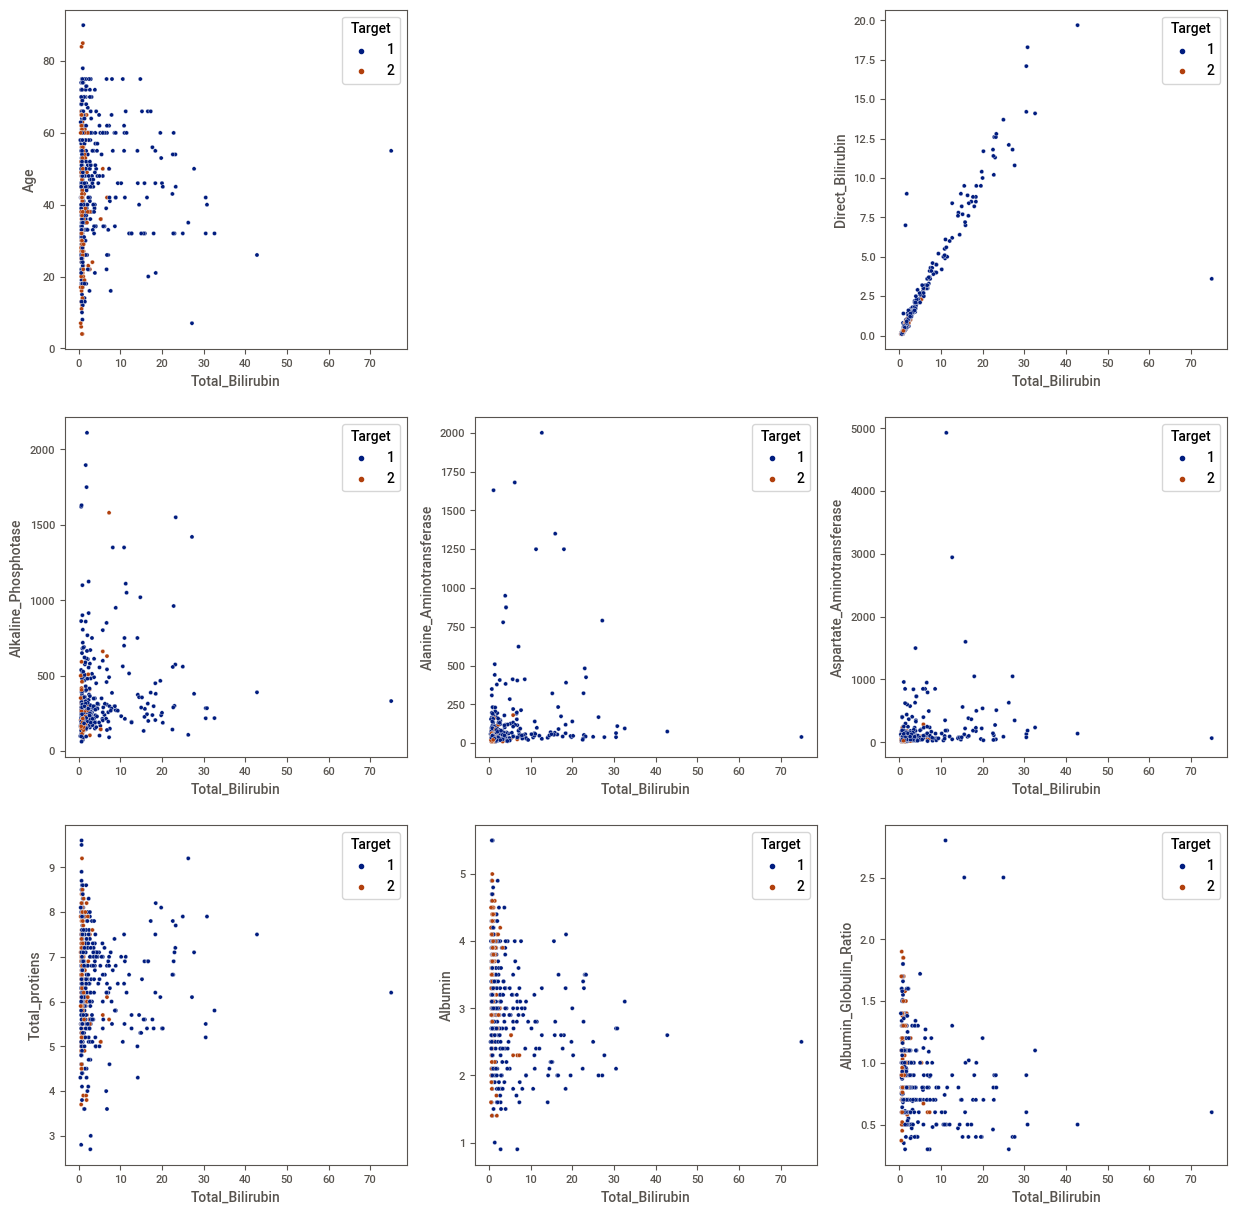

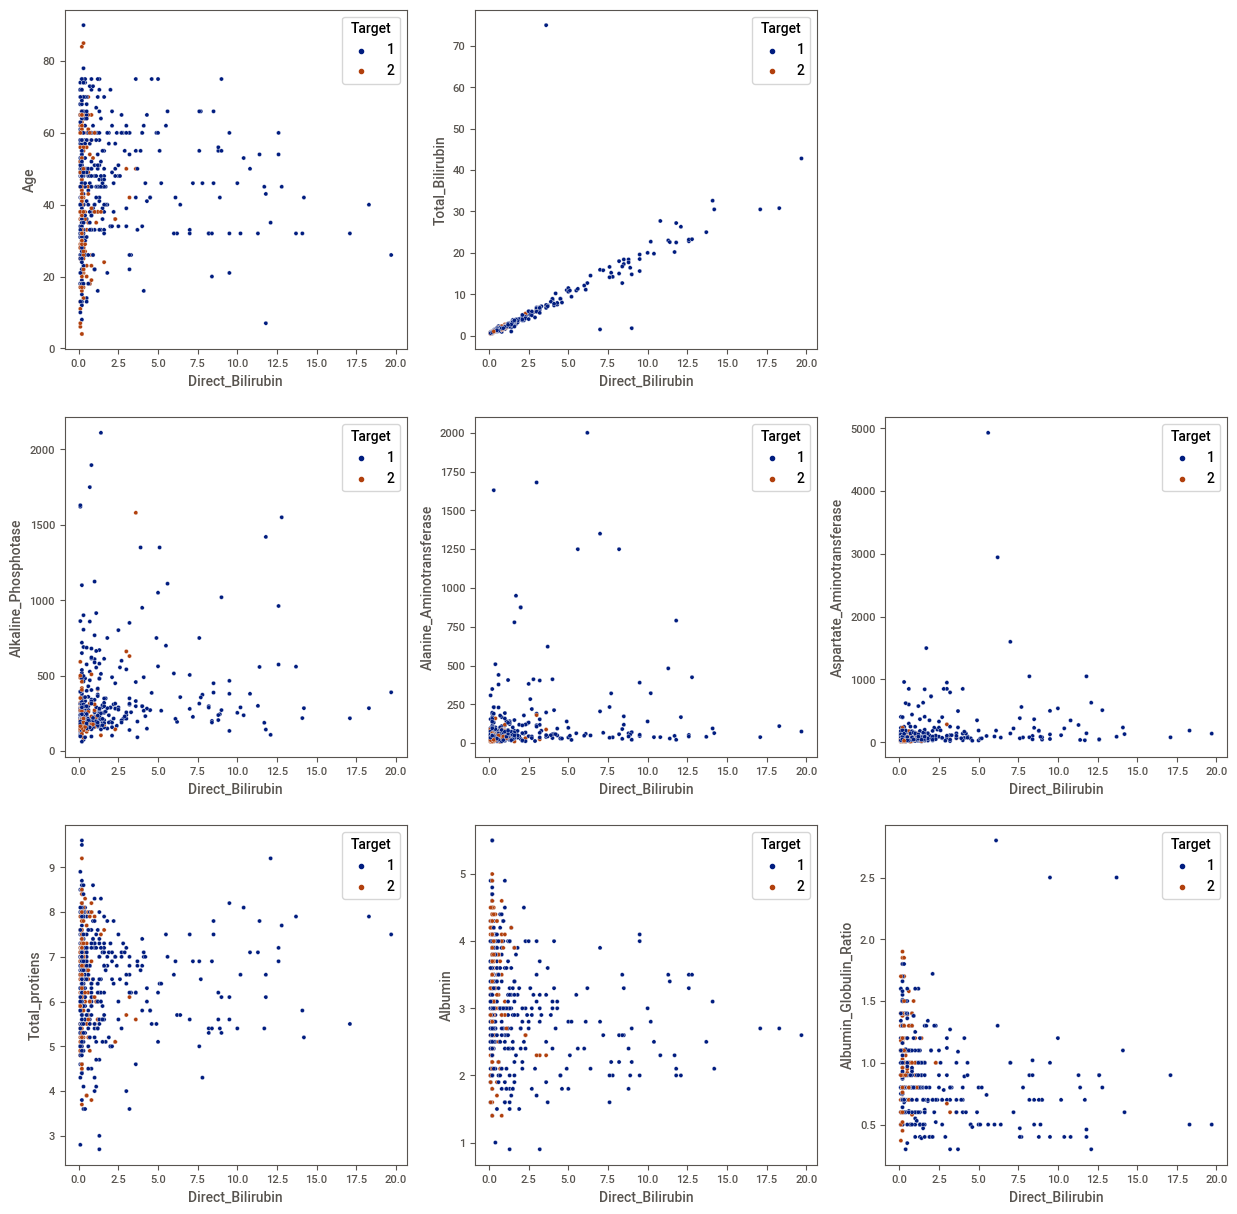

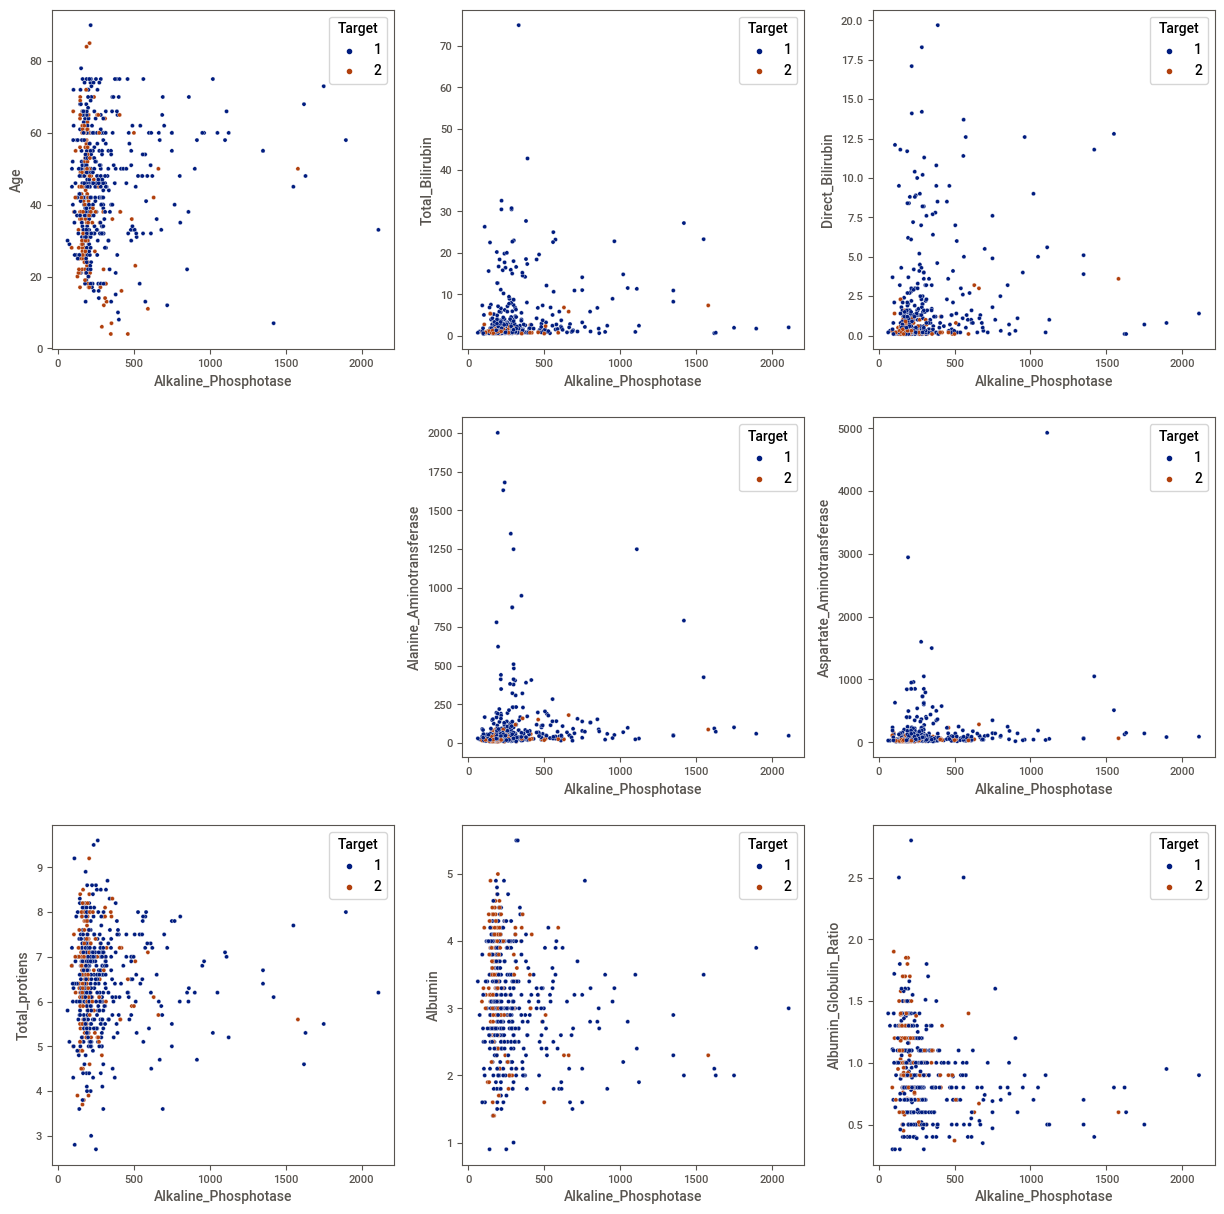

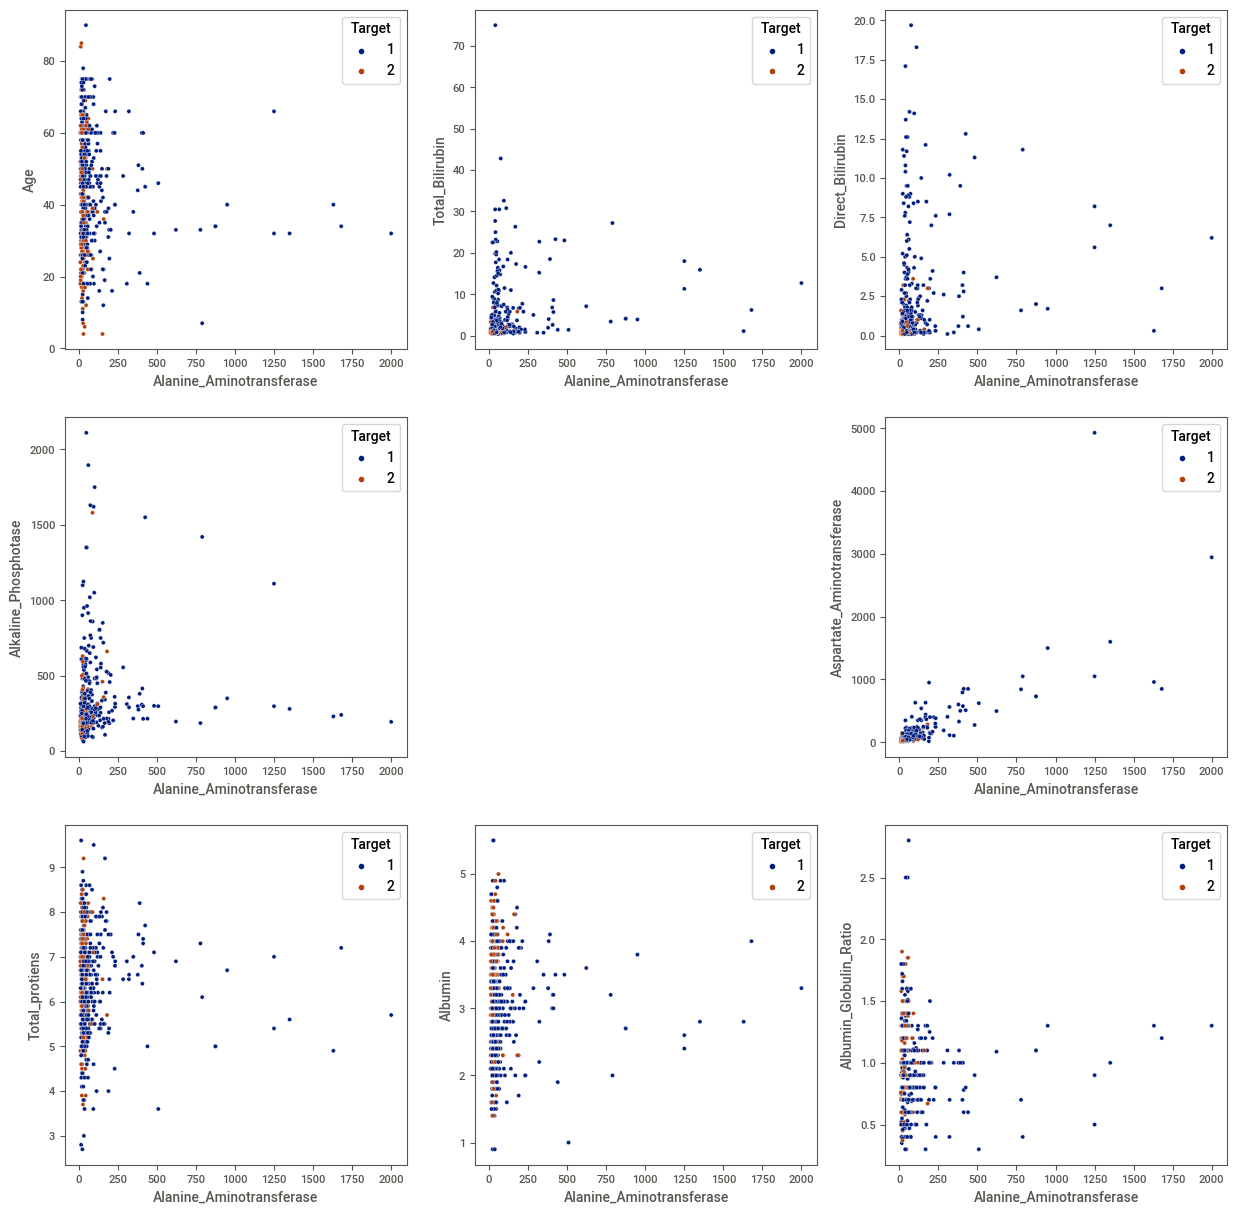

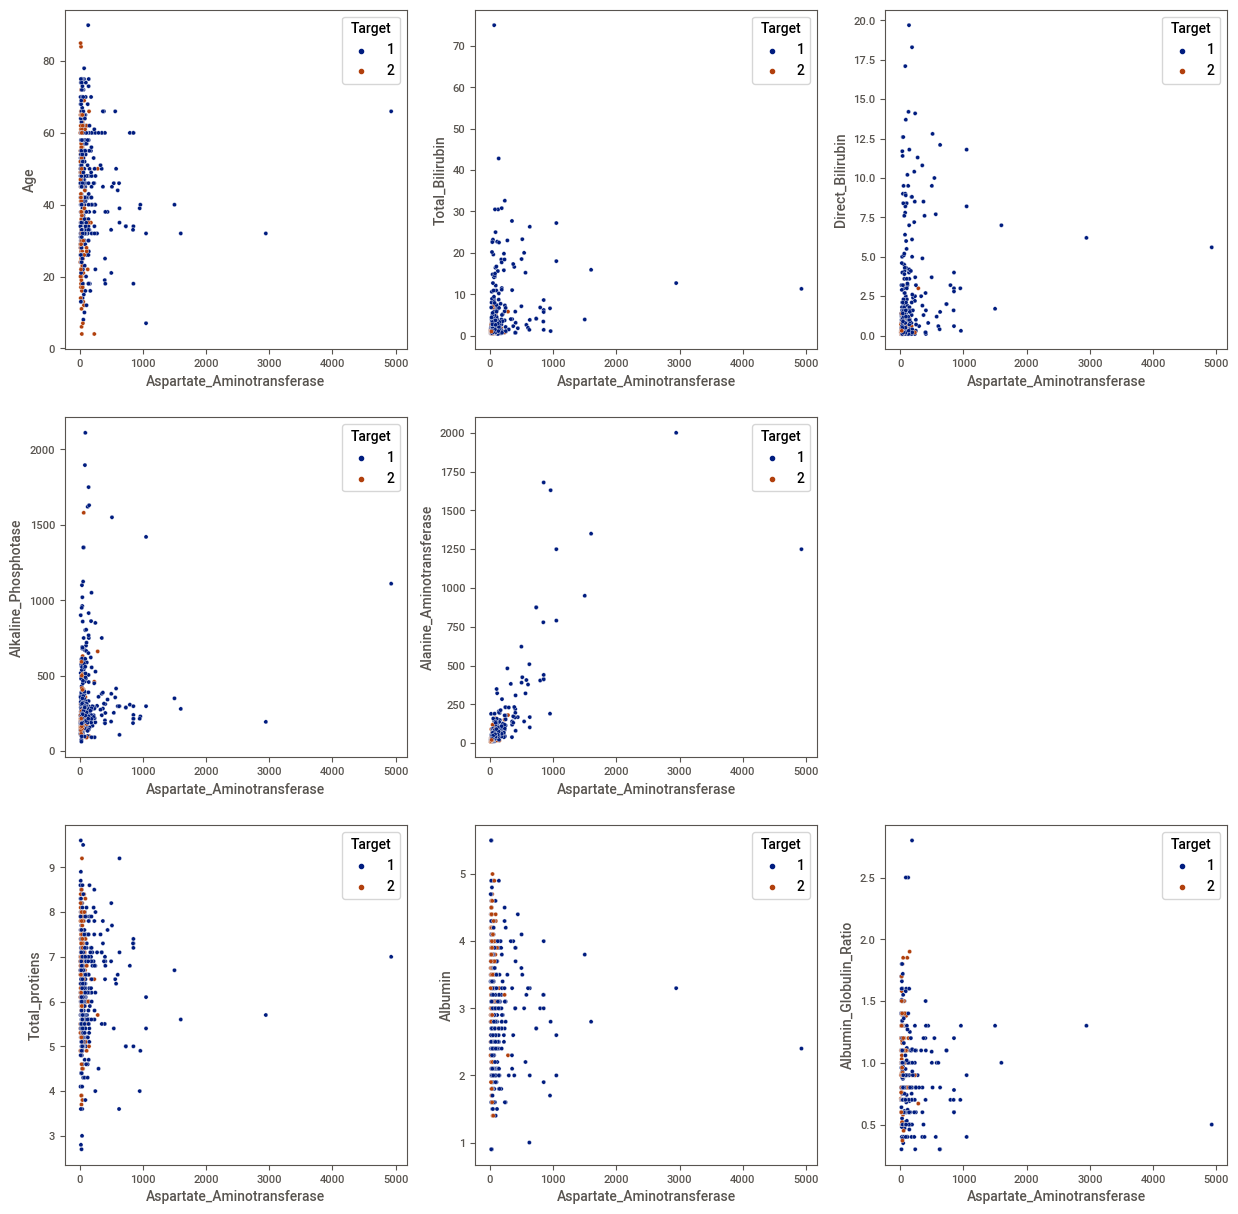

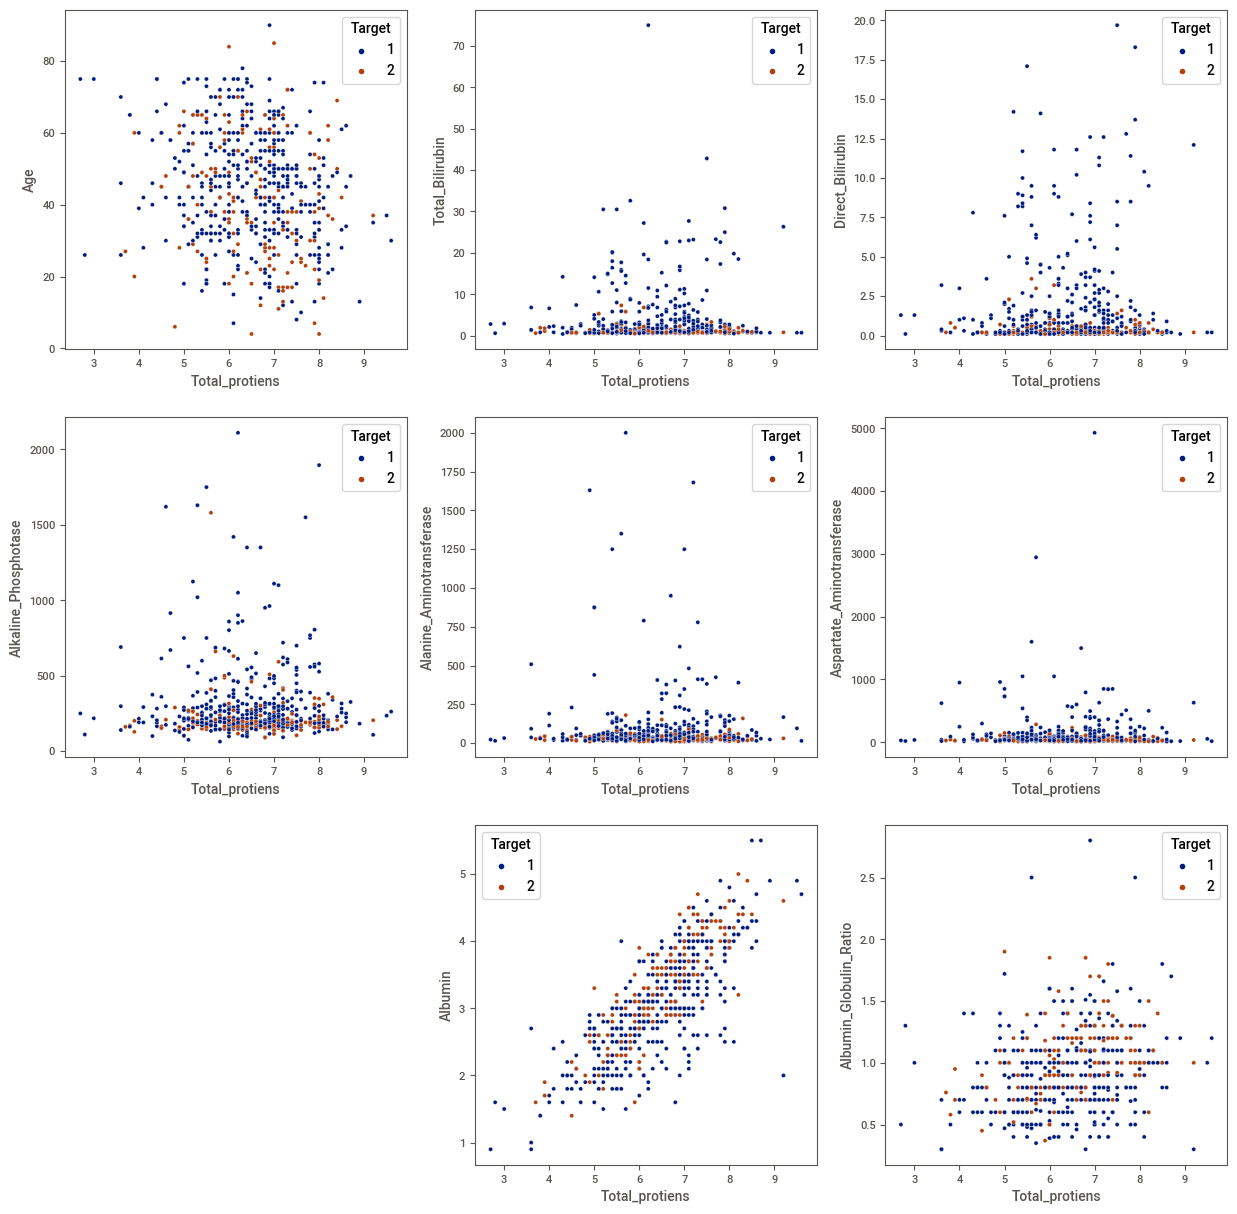

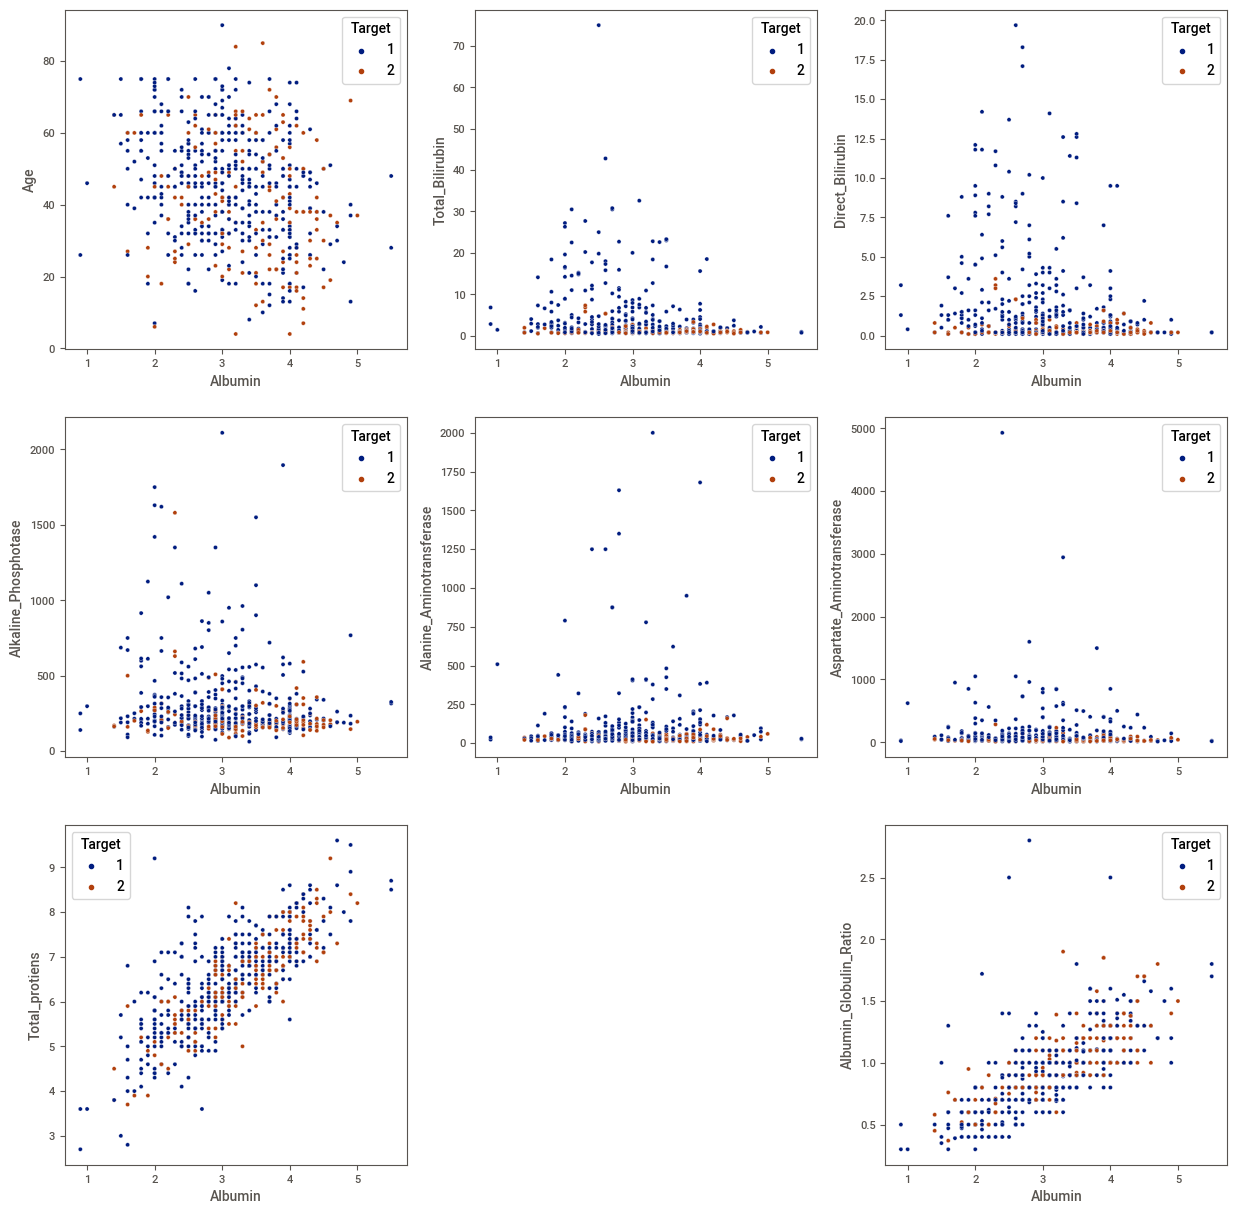

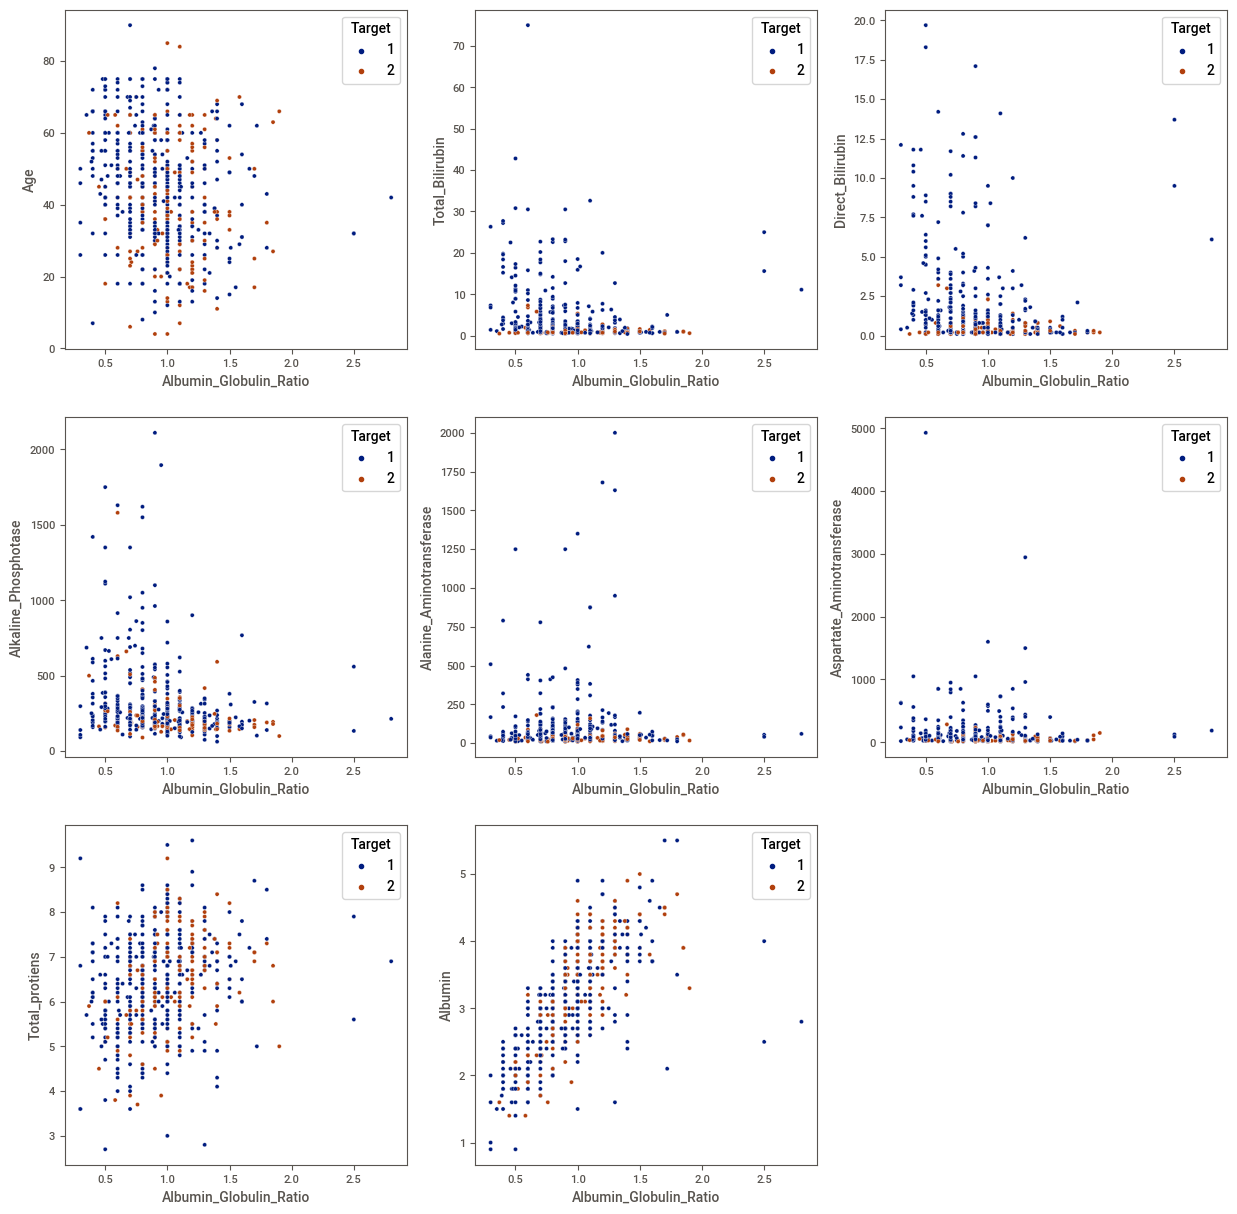

In [22]:
plt_num1 = 1

for column1 in liver_data_num:
  if plt_num1 <=9:
      plt_num2 = 1
      plt.figure(figsize=(15,15))
      for column2 in liver_data_num:
        if plt_num2 <=9:
          if column2 != column1:
            plt.subplot(3,3,plt_num2)
            sns.scatterplot(x=column1,y=column2,data=liver_data , hue="Target" , palette="dark")

        plt_num2+=1
  plt.show()
  plt_num1+=1

### Data pre=processing

In [23]:
liver_data.drop_duplicates(inplace=True)

In [24]:
liver_data.duplicated().sum()

0

In [25]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_protiens                0
Albumin                       0
Albumin_Globulin_Ratio        0
Target                        0
dtype: int64

#### Convert the categorical value to numerical value

In [26]:
liver_data_gender = pd.get_dummies(liver_data['Gender'], prefix='Male',drop_first=True)

In [27]:
liver_data_gender

Male_Male
0            0
1            1
2            1
3            1
4            1
..         ...
578          1
579          1
580          1
581          1
582          1

[566 rows x 1 columns]

In [28]:
liver_data_upd = pd.concat([liver_data , liver_data_gender] , axis=1).drop(['Gender'],axis=1)

In [29]:
liver_data_upd.rename(columns={'Male_Male':'Gender'} , inplace=True)

In [30]:
liver_data_upd

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_Globulin_Ratio  Target  Gender  
0        3.3                    0.90       1       0  
1        3.2                    0.74       1       1  
2        3.3                    0.89       1       1  
3        3.4                    1.00       1       1  
4        2.4                    0.40       1       1  
..       ...                     ...     ...     ...  
578      1.6                    0.37       2       1  
579      3.2                    1.10       1       1  
580      3.2                    1.00       1       1  
581      3.4                    1.00       1       1  
582      4.4                    1.50       2       1  

[566 rows x 11 columns]

### Split the dataset

In [31]:
 x = liver_data_upd.drop(['Target'] , axis=1)
 y = liver_data_upd['Target']

In [32]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

x_scl = std_scl.fit_transform(x)
x_scl = pd.DataFrame(x_scl , columns = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_photase',
                                        'Alanine_Aminotransferase','Aspartate_Aminotransferase',
                                        'Total_Protiens','Albumin','Albumin_Globulin_Ratio','Gender'])

In [33]:
liver_data_upd_scl = pd.concat([x_scl.reset_index(drop=True) , y.reset_index(drop=True)] , axis=1)

#### Feature selection via correlation

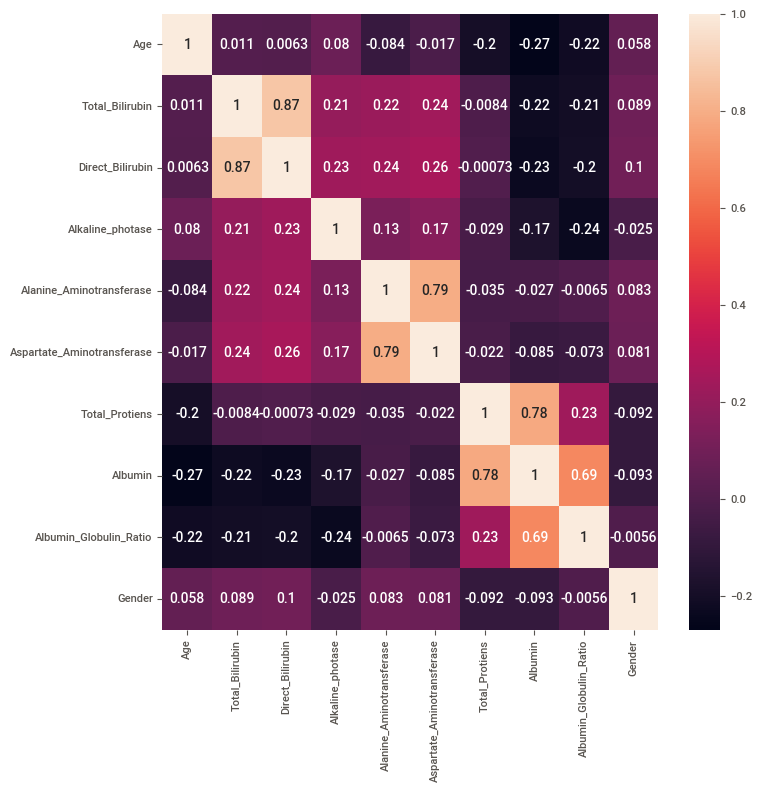

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(x_scl.corr(), annot=True)
plt.show()

### Feature selection - Filter method

#### Variance Threshold

In [35]:
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import VarianceThreshold as vt

x_train_vt , x_test_vt , y_train_vt , y_test_vt = tts(x_scl , y ,test_size=0.2 , random_state=9)
var_thr = vt(threshold=0.1)
var_thr.fit(x_train_vt)
print(var_thr.get_support())
print(sum(var_thr.get_support()))

[ True  True  True  True  True  True  True  True  True  True]
10


#### Correlation coeffcient

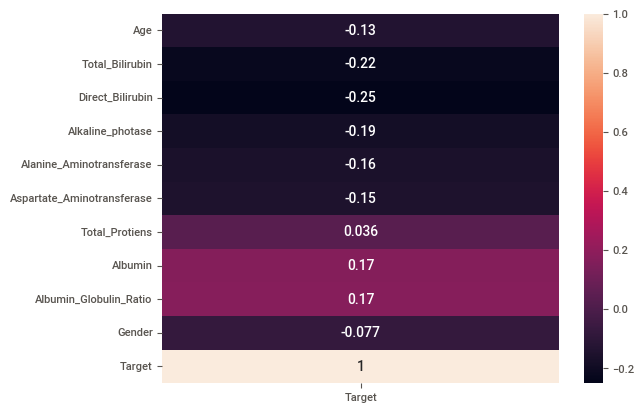

In [37]:
sns.heatmap(liver_data_upd_scl.corr()[["Target"]] , annot=True)
plt.show()

#### check the duplicate value

In [38]:
# from fast_ml.utilities import display_all
# from fast_ml.feature_selection import get_duplicate_features

# get_duplicate_features(liver_data_udp_scl)

ModuleNotFoundError: ignored

#### Information gain

In [39]:
liver_data_dep_list = []

from sklearn.feature_selection import mutual_info_classif

for rand_stat in range(0,101):
  liver_data_dep = mutual_info_classif(x_scl , y , random_state=rand_stat)
  liver_data_dep_df = pd.DataFrame(liver_data_dep , columns=['Dependence'], index=x_scl.columns)
  liver_data_dep_df_col = liver_data_dep_df[liver_data_dep_df['Dependence']==0]
  liver_data_dep_list.append([rand_stat , liver_data_dep_df_col.index])

liver_data_dep_list

[[0, Index(['Total_Protiens'], dtype='object')],
 [1, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [2, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [3, Index(['Albumin_Globulin_Ratio'], dtype='object')],
 [4, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [5, Index(['Total_Protiens'], dtype='object')],
 [6, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [7, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [8, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [9, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [10, Index(['Total_Protiens'], dtype='object')],
 [11, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [12, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [13, Index(['Albumin', 'Gender'], dtype='object')],
 [14, Index(['Total_Protiens', 'Albumin'], dtype='object')],
 [15, Index(['Total_Protiens', 'Albumin_Globulin_Ratio'], dtype='object')],
 [16, Index(['Total_Protiens

#### Chi2

In [40]:
from sklearn.feature_selection import SelectKBest , chi2

chi2_feat  =SelectKBest(chi2 , k=8)

best_feat = chi2_feat.fit_transform(x,y)
best_feat_ind = chi2_feat.get_support(indices=True)
print(x.columns[[best_feat_ind]])

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alanine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin',
       'Albumin_Globulin_Ratio'],
      dtype='object')


#### Feature Selection - Embedded method

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [42]:
x_train_tb , x_test_tb , y_train_tb , y_test_tb = tts(x_scl , y ,test_size=0.2 , random_state=9)
tb_model = SelectFromModel(RandomForestClassifier(n_estimators=20 , random_state=9))
tb_model.fit(x_train_tb , y_train_tb)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20,
                                                 random_state=9))

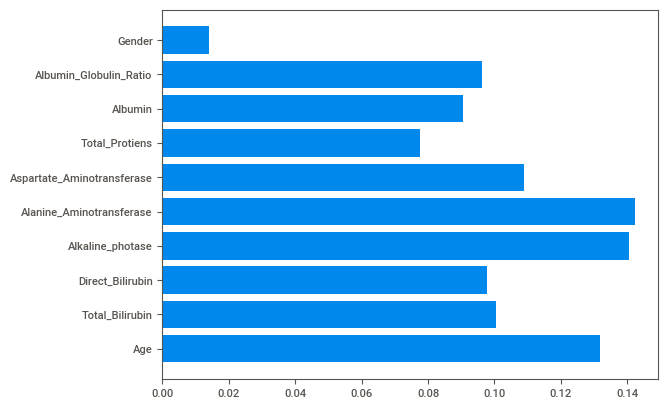

In [43]:
plt.barh(x_scl.columns , tb_model.estimator_.feature_importances_)
plt.show()

In [44]:
x_scl_wog = x_scl.drop("Gender",axis=1)

## Test_train split

In [48]:
x_train , y_train , y_train , y_test = tts(x_scl , y , test_size = 0.2, random_state = 9)

In [50]:
x_train_wog , y_train_wog , x_test_wog , y_test_wog = tts(x_scl_wog , y , test_size = 0.2 , random_state=9)

### Model selection and creation